Title :**bold text**

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from xgboost import XGBRegressor

In [68]:
dt = pd.read_csv('Energy_Usage_2010.csv')

**Data Preview:**

In [69]:
dt.head()

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
0,Archer Heights,170315704001006.0000,Residential,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,89.0000,24.0000,2.0000,71.3300,3.8700,23.0000,0.9582,9.0000,0.3910,23.0000
1,Ashburn,170317005014004.0000,Residential,Multi 7+,7334.0000,7741.0000,4214.0000,4284.0000,2518.0000,4273.0000,...,112.0000,67.0000,2.0000,41.0000,1.8100,62.0000,0.9254,50.0000,0.8059,62.0000
2,Auburn Gresham,170317105001006.0000,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,102.0000,48.0000,3.0000,86.0000,3.0000,34.0000,0.7082,23.0000,0.6759,34.0000
3,Austin,170312503003003.0000,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,121.0000,56.0000,2.0000,84.0000,2.9500,41.0000,0.7321,32.0000,0.7800,41.0000
4,Austin,170312504002008.0000,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,62.0000,23.0000,2.0000,85.0000,3.2600,19.0000,0.8261,11.0000,0.5790,19.0000


**Fetching Basic Information about the dataset:**

In [70]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67051 entries, 0 to 67050
Data columns (total 73 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   COMMUNITY AREA NAME                  67051 non-null  object 
 1   CENSUS BLOCK                         66974 non-null  float64
 2   BUILDING TYPE                        66974 non-null  object 
 3   BUILDING_SUBTYPE                     66974 non-null  object 
 4   KWH JANUARY 2010                     66180 non-null  float64
 5   KWH FEBRUARY 2010                    66180 non-null  float64
 6   KWH MARCH 2010                       66180 non-null  float64
 7   KWH APRIL 2010                       66180 non-null  float64
 8   KWH MAY 2010                         66180 non-null  float64
 9   KWH JUNE 2010                        66180 non-null  float64
 10  KWH JULY 2010                        66180 non-null  float64
 11  KWH AUGUST 2010             

**Checking for Null entries:**

In [71]:
dt.isnull().sum()

,0
COMMUNITY AREA NAME,0
CENSUS BLOCK,77
BUILDING TYPE,77
BUILDING_SUBTYPE,77
KWH JANUARY 2010,871
...,...
OCCUPIED UNITS,14
OCCUPIED UNITS PERCENTAGE,2445
RENTER-OCCUPIED HOUSING UNITS,14
RENTER-OCCUPIED HOUSING PERCENTAGE,2618


In [72]:
dt.describe()


,CENSUS BLOCK,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
count,66974.0000,66180.0000,66180.0000,66180.0000,66180.0000,66180.0000,66180.0000,66180.0000,66180.0000,66180.0000,...,67037.0000,67037.0000,67051.0000,67051.0000,67037.0000,67037.0000,64606.0000,67037.0000,64433.0000,67037.0000
mean,170314044719448.7812,17581.5878,17376.5138,16242.1222,15956.9638,19066.2278,23004.8526,24828.9070,22675.2641,18564.0972,...,105.1802,48.3759,1.8876,71.5930,3.4547,42.3475,0.8804,25.4390,0.5117,42.3475
std,2776391528.4120,348250.8249,335190.9633,316471.3220,311823.2195,363442.8744,398858.1963,413595.5092,394098.8736,348621.2185,...,801.3392,426.9413,1.9572,34.1684,26.1462,371.0250,0.1309,251.1936,0.2884,371.0250
min,170310101001000.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,170311605021001.0000,1370.0000,1613.0000,1586.0000,1579.0000,1957.0000,2700.0000,3203.0000,2837.7500,2027.0000,...,37.0000,15.0000,1.1400,53.0000,2.1500,13.0000,0.8332,3.0000,0.2860,13.0000
50%,170313301002019.5000,3481.5000,3814.0000,3681.5000,3646.0000,4528.0000,6295.0000,7389.0000,6413.5000,4573.0000,...,64.0000,25.0000,1.7500,80.0000,2.7000,22.0000,0.9146,11.0000,0.5379,22.0000
75%,170316701002012.0000,7157.0000,7410.2500,7059.0000,7010.0000,8943.5000,12828.5000,14657.5000,12298.0000,8634.0000,...,105.0000,42.0000,2.0000,96.5000,3.3200,37.0000,0.9677,23.0000,0.7330,37.0000
max,170319801001006.0000,52985338.0000,47879756.0000,44136463.0000,42220549.0000,48619249.0000,52569078.0000,55139826.0000,51589125.0000,44503864.0000,...,67388.0000,51372.0000,110.0000,158.0000,2061.9200,43222.0000,1.0000,28335.0000,1.0000,43222.0000


In [73]:
# code in this cell
# Fetching the number of rows and columns
rows_count = dt.shape[0]
columns_count = dt.shape[1]

# Print the results
print(f"Number of rows is: {rows_count}")
print(f"Number of columns is: {columns_count}")

Number of rows is: 67051
Number of columns is: 73


In [74]:
print(dt.columns.tolist())

['COMMUNITY AREA NAME', 'CENSUS BLOCK', 'BUILDING TYPE', 'BUILDING_SUBTYPE', 'KWH JANUARY 2010', 'KWH FEBRUARY 2010', 'KWH MARCH 2010', 'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010', 'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010', 'KWH OCTOBER 2010', 'KWH NOVEMBER 2010', 'KWH DECEMBER 2010', 'TOTAL KWH', 'ELECTRICITY ACCOUNTS', 'ZERO KWH ACCOUNTS', 'THERM JANUARY 2010', 'THERM FEBRUARY 2010', 'THERM MARCH 2010', 'TERM APRIL 2010', 'THERM MAY 2010', 'THERM JUNE 2010', 'THERM JULY 2010', 'THERM AUGUST 2010', 'THERM SEPTEMBER 2010', 'THERM OCTOBER 2010', 'THERM NOVEMBER 2010', 'THERM DECEMBER 2010', 'TOTAL THERMS', 'GAS ACCOUNTS', 'KWH TOTAL SQFT', 'THERMS TOTAL SQFT', 'KWH MEAN 2010', 'KWH STANDARD DEVIATION 2010', 'KWH MINIMUM 2010', 'KWH 1ST QUARTILE 2010', 'KWH 2ND QUARTILE 2010', 'KWH 3RD QUARTILE 2010', 'KWH MAXIMUM 2010', 'KWH SQFT MEAN 2010', 'KWH SQFT STANDARD DEVIATION 2010', 'KWH SQFT MINIMUM 2010', 'KWH SQFT 1ST QUARTILE 2010', 'KWH SQFT 2ND QUARTILE 2010', 'KWH 

#### Column Descriptions:


- COMMUNITY AREA NAME :	Community Name
- CENSUS BLOCK : Census Block number obtained in the address matching/geocoding algorithms. Blank Census Blocks correspond to data that was aggregated to the Community Area due to privacy issues.
- BUILDING TYPE	: Building Type: Residential, Commercial, Industrial. Blank data corresponds to blank Census Blocks.
- BUILDING_SUBTYPE :	Building Sub-Type (6): Single Family, Multi <7, Multi 7+, Commercial, Industrial, Municipal. Blank cells correspond to blank Census Blocks.
- KWH JANUARY 2010 - KWH DECEMBER 2010 :	Kilowatt hours (kWh) for January 2010 to December 2010
- TOTAL KWH: Total electricity consumed in 2010 in kWh.
- ELECTRICITY ACCOUNTS:	Number of accounts with kilowatt hour information from ComEd. An account does not equate to buildings.
- ZERO KWH ACCOUNTS:	Number of accounts with 0 kilowatt hours amounts for 12 months in 2010 from ComEd.
- THERM JANUARY 2010 - THERM DECEMBER 2010 :	Gas consumption in therms for January 2010 to December 2010.
- TOTAL THERMS : Total Gas consumption in therms in 2010.
- GAS ACCOUNTS: Number of accounts with THERM information from the Peoples Account and Usage files in 2010. Accounts does not equate to buildings.
- KWH TOTAL SQFT:	Total square footage associated with the electric energy usage in 2010 according to Cook County Assessor Records.
- THERMS TOTAL SQFT:	Total square footage associated with the natural gas energy usage for Kilowatt Hours in 2010 according to Cook County Assessor Records.
- KWH MEAN 2010, KWH STANDARD DEVIATION 2010, KWH MINIMUM 2010	, KWH 1ST QUARTILE 2010, KWH 2ND QUARTILE 2010, KWH 3RD QUARTILE 2010, KWH MAXIMUM 2010	, KWH SQFT MEAN 2010, KWH SQFT STANDARD DEVIATION 2010 , KWH SQFT MINIMUM 2010,KWH SQFT 1ST QUARTILE 2010, KWH SQFT 2ND QUARTILE 2010 , KWH SQFT 3RD QUARTILE 2010,KWH SQFT MAXIMUM 2010 , THERM MEAN 2010, THERM STANDARD DEVIATION 2010 , THERM MINIMUM 2010,THERM 1ST QUARTILE 2010, THERM 2ND QUARTILE 2010	,THERM 3RD QUARTILE 2010, THERM MAXIMUM 2010, THERMS SQFT MEAN 2010, THERMS SQFT STANDARD DEVIATION 2010, THERMS SQFT MINIMUM 2010, THERMS SQFT 1ST QUARTILE 2010 , THERMS SQFT 2ND QUARTILE 2010, THERMS SQFT 3RD QUARTILE 2010, THERMS SQFT MAXIMUM 2010  : Derived from 	KWH TOTAL SQFT & THERMS TOTAL SQFT columns.
- TOTAL POPULATION : Total population from Census 2010 report (QT-P6) Race alone or in combination and Hispanic or Latino 2010.
- TOTAL UNITS :	Total number of housing units from census 2010 report (H1) Occupancy Status.
- AVERAGE STORIES:	Average number of stories based on data from Cook County Assessor's Office.
- AVERAGE BUILDING AGE:	Average Age of the buildings based on data from Cook County Assessor's Office.
- AVERAGE HOUSESIZE:	Average household size from Census 2010 report QT-P11 Households and Families.
- OCCUPIED UNITS:	Number of housing units that are occupied from census 2010 report (H1) Occupancy Status.
- OCCUPIED UNITS PERCENTAGE : Occupied units percentage.
- RENTER-OCCUPIED HOUSING UNITS:	Number of housing units that are renter occupied from 'Census 2010 report (QT-H2) Tenure, Household Size and Age of Householder'.
- RENTER-OCCUPIED HOUSING PERCENTAGE:	Percentage of occupied housing units that are renters from 'Census report (QT-H2) Tenure, Household Size and Age of Householder'
- OCCUPIED HOUSING UNITS:	Number of occupied housing units from 'Census 2010 report (QT-H2) Tenure, Household Size and Age of Householder'.



**Distribution of data by Building type:**

In [75]:
build_type_counts= dt["BUILDING TYPE"].value_counts()
build_type_counts

,count
BUILDING TYPE,
Residential,49747
Commercial,17185
Industrial,42


<ipython-input-76-9d6a0004eb28>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


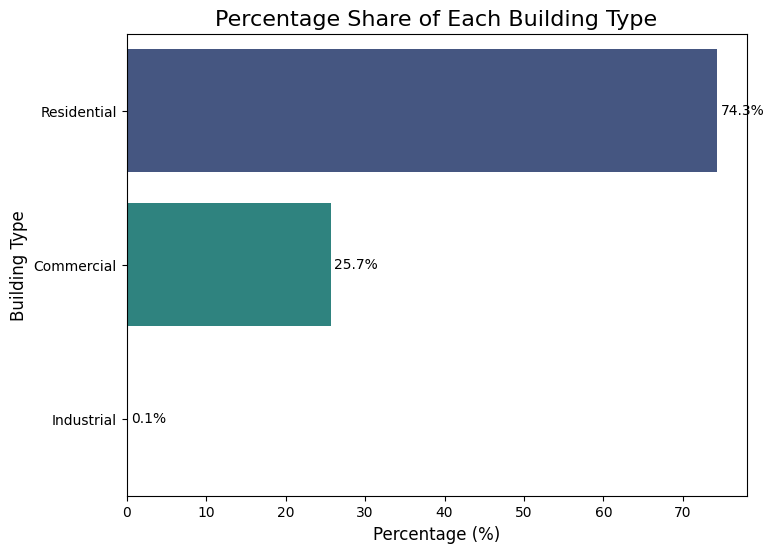

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage share for each building type
build_type_percentages = dt["BUILDING TYPE"].value_counts(normalize=True).reset_index()
build_type_percentages.columns = ['BUILDING TYPE', 'PERCENTAGE']
build_type_percentages['PERCENTAGE'] *= 100  # Convert to percentage

# Plot the percentage bar graph with a new color palette
plt.figure(figsize=(8, 6))
sns.barplot(
    data=build_type_percentages,
    x='PERCENTAGE',
    y='BUILDING TYPE',
    palette='viridis'  # Change to 'viridis' for a new color scheme
)

plt.title('Percentage Share of Each Building Type', fontsize=16)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Building Type', fontsize=12)

# Add percentage values on the bars
for index, value in enumerate(build_type_percentages['PERCENTAGE']):
    plt.text(value + 0.5, index, f'{value:.1f}%', va='center', fontsize=10)

plt.show()



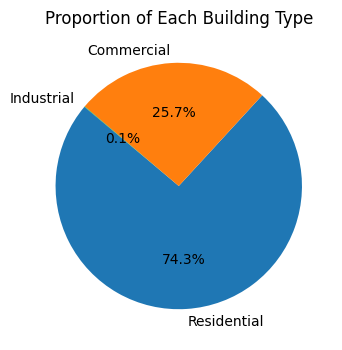

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 4))
plt.pie(build_type_counts, labels=build_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Building Type')
plt.show()

In [78]:
dt['BUILDING_SUBTYPE'].value_counts()

,count
BUILDING_SUBTYPE,
Multi < 7,27284
Single Family,26366
Commercial,7775
Multi 7+,5225
Municipal,282
Industrial,42


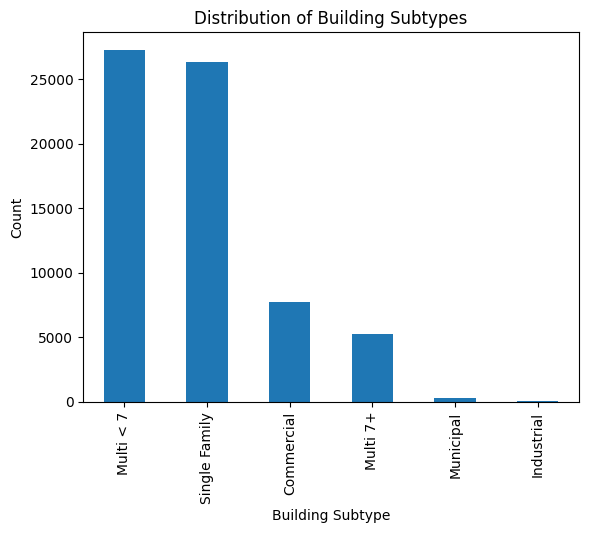

In [79]:
import matplotlib.pyplot as plt

# Plotting the distribution of building subtypes
dt['BUILDING_SUBTYPE'].value_counts().plot(kind='bar', title='Distribution of Building Subtypes')
plt.xlabel('Building Subtype')
plt.ylabel('Count')
plt.show()



Focusing on single-family residences ensures a more homogeneous dataset with consistent energy consumption patterns, making the analysis more manageable and relevant for urban sustainability efforts. Multi-unit buildings, like Multi < 7, introduce variability due to shared facilities and different occupancy dynamics, which complicates the modeling process and diverges from the goal of optimizing energy use at the household level.

In [80]:
build_subtypes = dt.groupby('BUILDING TYPE')['BUILDING_SUBTYPE'].value_counts()

for building_type, subtypes in build_subtypes.groupby(level=0):
    sorted_subtypes = subtypes.sort_values(ascending=False)
    print(f"{building_type}:\n{sorted_subtypes}\n")



Commercial:
BUILDING TYPE  BUILDING_SUBTYPE
Commercial     Commercial          7775
               Multi < 7           6731
               Multi 7+            2396
               Municipal            282
               Single Family          1
Name: count, dtype: int64

Industrial:
BUILDING TYPE  BUILDING_SUBTYPE
Industrial     Industrial          42
Name: count, dtype: int64

Residential:
BUILDING TYPE  BUILDING_SUBTYPE
Residential    Single Family       26365
               Multi < 7           20553
               Multi 7+             2829
Name: count, dtype: int64



<Figure size 1400x800 with 0 Axes>

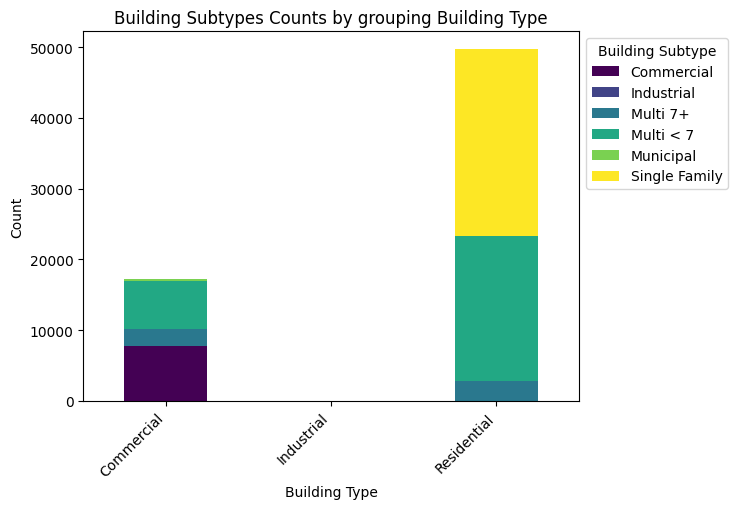

In [81]:
build_type_subtypes = dt.groupby('BUILDING TYPE')['BUILDING_SUBTYPE'].value_counts().unstack()

plt.figure(figsize=(14, 8))
build_type_subtypes.plot(kind='bar', stacked=True,colormap='viridis')
plt.title('Building Subtypes Counts by grouping Building Type')
plt.xlabel('Building Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Building Subtype', bbox_to_anchor=(1, 1))
plt.show()

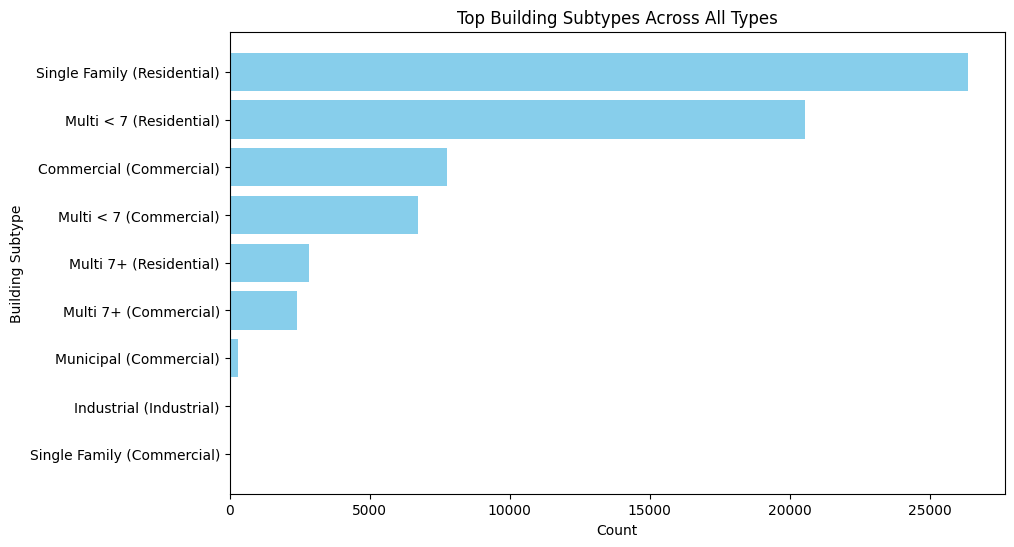

In [82]:
# Flatten the DataFrame and sort
data = build_type_subtypes.stack().reset_index()
data.columns = ['BUILDING TYPE', 'BUILDING_SUBTYPE', 'Count']
top_n = data.sort_values('Count', ascending=False).head(15)

# Plotting horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_n['BUILDING_SUBTYPE'] + ' (' + top_n['BUILDING TYPE'] + ')', top_n['Count'], color='skyblue')
plt.title('Top Building Subtypes Across All Types')
plt.xlabel('Count')
plt.ylabel('Building Subtype')
plt.gca().invert_yaxis()
plt.show()


**Energy Efficiency Analysis**
Analyze energy consumption per square foot (KWH TOTAL SQFT and THERMS TOTAL SQFT) across building types.

In [83]:
# Grouping by 'BUILDING TYPE' and calculating summary statistics for 'KWH TOTAL SQFT'
summary_stats = dt.groupby('BUILDING TYPE')['KWH TOTAL SQFT'].describe()

# Displaying the summary statistics table
print(summary_stats[['mean', '50%', 'std']])  # '50%' is the median value



                    mean        50%         std
BUILDING TYPE                                  
Commercial    39522.7060  7982.5000 205871.6623
Industrial    22458.3846  7732.5000  42966.5918
Residential   14961.6795 11722.0000  18086.9372


**1. Commercial:**

*   Mean (39522.71): On average, a commercial building uses 39,522.71 kWh persquare foot of electricity in 2010.
*  Median (7982.5): The middle value of the data is 7982.5 kWh per square foot, meaning 50% of the commercial buildings use more than this amount, and 50% use less.

* Standard Deviation (205871.66): The large value (205,871.66) indicates there is a high level of variation in the electricity usage per square foot across different commercial buildings. Some buildings may have very high electricity consumption, while others may have much lower usage.

**2. Industrial:**

*  Mean (22458.38): On average, an industrial building uses 22,458.38 kWh per square foot of electricity in 2010.
*  Median (7732.5): The middle value of the data is 7732.5 kWh per square foot.
*  Standard Deviation (42966.59): The standard deviation is 42,966.59, suggesting that electricity usage in industrial buildings varies quite a bit, with some buildings consuming far more than others.

**3. Residential:**
*  Mean (14961.68): On average, a residential building uses 14,961.68 kWh per
square foot of electricity in 2010.
*  Median (11722.0): The middle value of the data is 11,722.0 kWh per square foot.
* Standard Deviation (18,086.94): The standard deviation is 18,086.94, indicating that there is some variation in residential electricity consumption across buildings.

Since there is more deviation in the other building types, we have preferred to take Residential into consideration

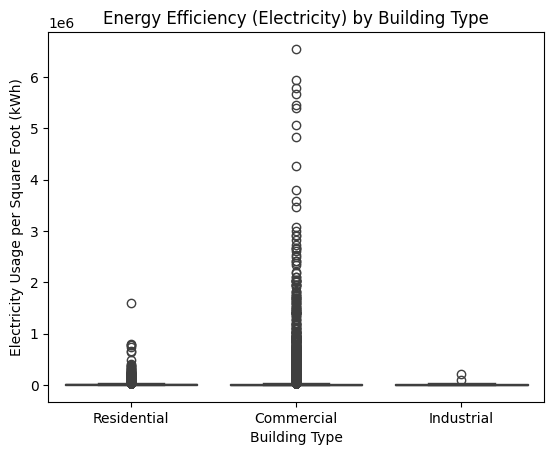

In [84]:
sns.boxplot(x='BUILDING TYPE', y='KWH TOTAL SQFT', data=dt)
plt.title('Energy Efficiency (Electricity) by Building Type')
plt.ylabel('Electricity Usage per Square Foot (kWh)')
plt.xlabel('Building Type')
plt.show()



From above we can see, the main reason to focus on Residential Single Family

In [85]:
occupied_units_by_building_type = dt.groupby('BUILDING TYPE')['OCCUPIED UNITS'].sum().reset_index()
occupied_units_by_building_type

,BUILDING TYPE,OCCUPIED UNITS
0,Commercial,763904.0000
1,Industrial,837.0000
2,Residential,1478480.0000


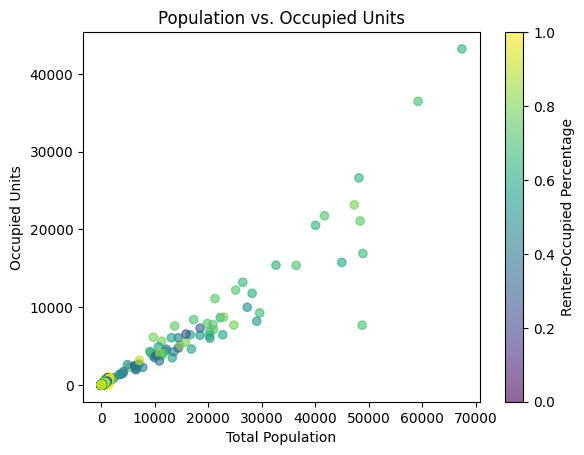

In [86]:
plt.scatter(dt['TOTAL POPULATION'], dt['OCCUPIED UNITS'], alpha=0.6, c=dt['RENTER-OCCUPIED HOUSING PERCENTAGE'], cmap='viridis')
plt.colorbar(label='Renter-Occupied Percentage')
plt.title('Population vs. Occupied Units')
plt.xlabel('Total Population')
plt.ylabel('Occupied Units')
plt.show()


In [87]:
summary_stats = dt[['TOTAL POPULATION', 'OCCUPIED UNITS', 'RENTER-OCCUPIED HOUSING PERCENTAGE']].describe()
print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
       TOTAL POPULATION  OCCUPIED UNITS  RENTER-OCCUPIED HOUSING PERCENTAGE
count        67037.0000      67037.0000                          64433.0000
mean           105.1802         42.3475                              0.5117
std            801.3392        371.0250                              0.2884
min              0.0000          0.0000                              0.0000
25%             37.0000         13.0000                              0.2860
50%             64.0000         22.0000                              0.5379
75%            105.0000         37.0000                              0.7330
max          67388.0000      43222.0000                              1.0000


<ipython-input-88-61319bd4ab8a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BUILDING TYPE', y='OCCUPIED UNITS', data=occupied_units_by_building_type, palette='Blues')


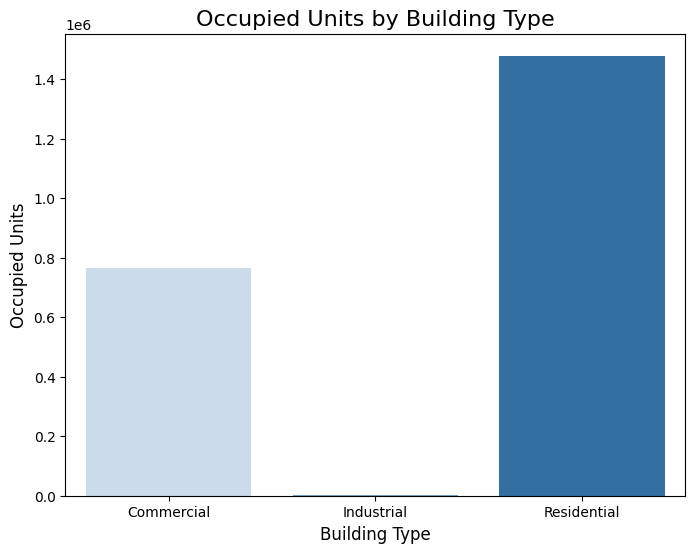

In [88]:
# Bar plot for occupied units by building type
occupied_units_by_building_type = dt.groupby('BUILDING TYPE')['OCCUPIED UNITS'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='BUILDING TYPE', y='OCCUPIED UNITS', data=occupied_units_by_building_type, palette='Blues')
plt.title('Occupied Units by Building Type', fontsize=16)
plt.xlabel('Building Type', fontsize=12)
plt.ylabel('Occupied Units', fontsize=12)
plt.show()


**Conclusion:**
The Commercial and Industrial categories have more variability in building subtypes, but Single Family buildings are the dominant subtype only in the Residential category.
Since single-family homes are the most consistent and homogenous category in terms of energy consumption patterns, they are often chosen for focused analysis when the goal is to optimize energy usage in urban residential communities.So we can focus on Single Family homes in the Residential category to streamline your analysis and avoid the complexities introduced by other subtypes like Multi < 7. Based on analysis made we decided to focus on Residential Single family buildings.

**Demographic Insights:**

To Analyze average building age distribution across community areas.

Visualization: We have used the Histogram for Building Age
 to Understand the age distributio.

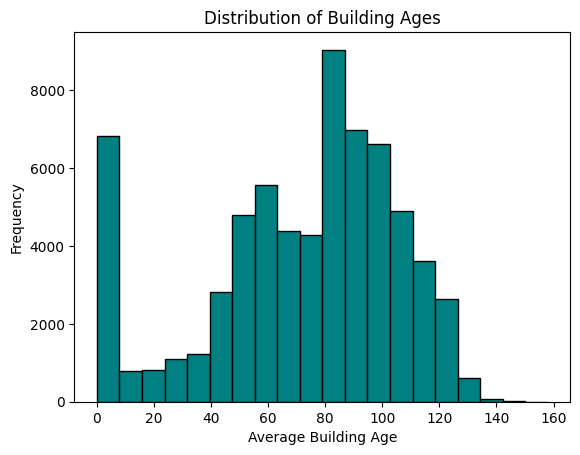

In [89]:
plt.hist(dt['AVERAGE BUILDING AGE'], bins=20, color='teal', edgecolor='black')
plt.title('Distribution of Building Ages')
plt.xlabel('Average Building Age')
plt.ylabel('Frequency')
plt.show()


In [90]:
# Fetching summary statistics for the 'AVERAGE BUILDING AGE' column
building_age_stats = dt['AVERAGE BUILDING AGE'].describe()

# Display the summary statistics
print(building_age_stats)


count   67051.0000
mean       71.5930
std        34.1684
min         0.0000
25%        53.0000
50%        80.0000
75%        96.5000
max       158.0000
Name: AVERAGE BUILDING AGE, dtype: float64


**Comparative Analysis:**

To compare the percentage of renter-occupied units across community areas.

Visualization: We have used Bar Chart for Renter Occupancy across different communities.

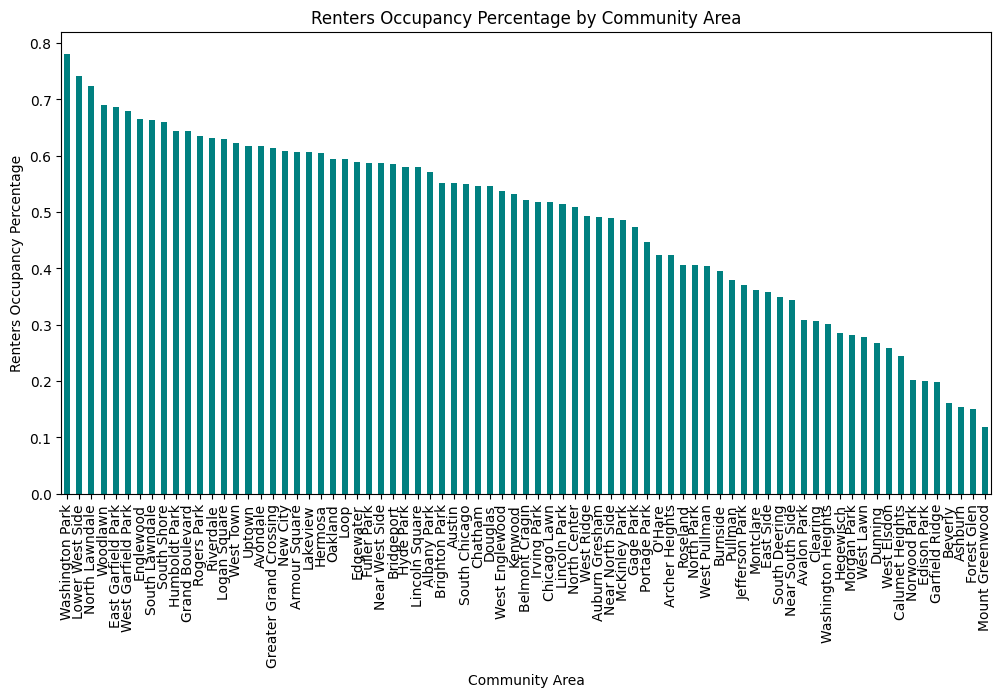

In [91]:
renters_data = dt.groupby('COMMUNITY AREA NAME')['RENTER-OCCUPIED HOUSING PERCENTAGE'].mean().sort_values(ascending=False)

renters_data.plot(kind='bar', figsize=(12, 6), color='teal')
plt.title('Renters Occupancy Percentage by Community Area')
plt.xlabel('Community Area')
plt.ylabel('Renters Occupancy Percentage')
plt.xticks(rotation=90)
plt.show()


**"Comparison of Gas and Electricity Consumption by Community Area":**

This bar plot compares Total Gas Consumption (Therms) and Total Electricity Consumption (kWh) across different Community Areas.

*  Teal bars represent Gas Consumption (in Therms).
*  Orange bars represent Electricity Consumption (in kWh).
The plot helps to easily compare energy usage between gas and electricity for each community. Longer bars indicate higher consumption, allowing to identify which areas use more gas versus electricity. This can inform energy efficiency efforts and resource allocation in different regions.

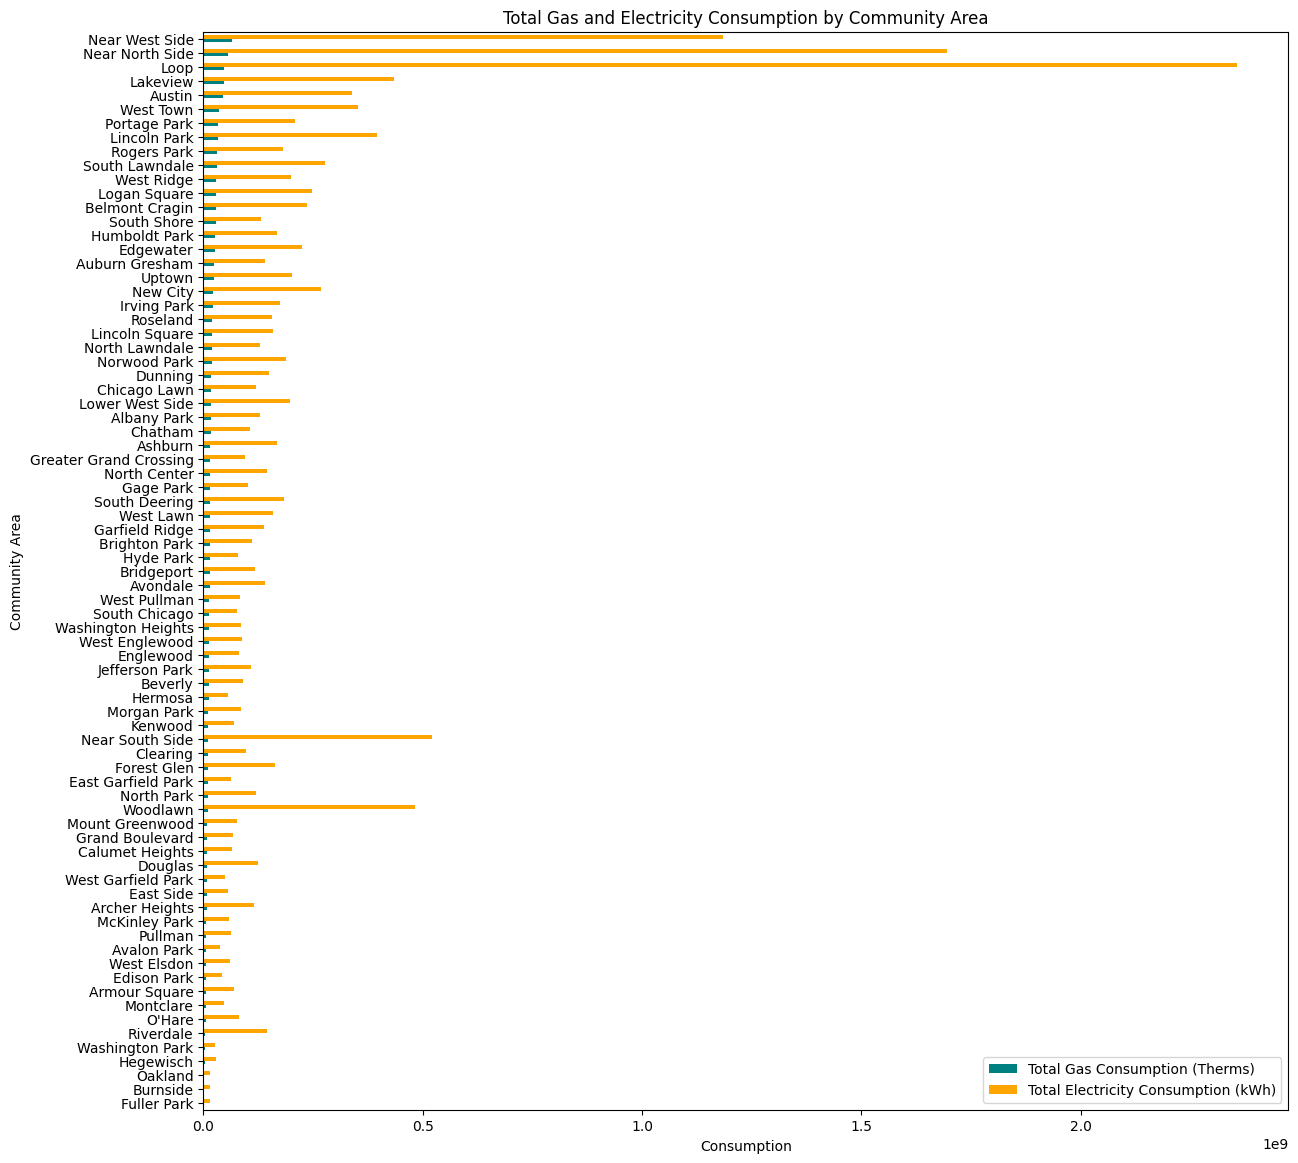

In [92]:
import matplotlib.pyplot as plt
import pandas as pd

# Grouping the data for gas and electricity consumption by community area
community_gas_usge = dt.groupby('COMMUNITY AREA NAME')['TOTAL THERMS'].sum().sort_values()
community_energy_usage = dt.groupby('COMMUNITY AREA NAME')['TOTAL KWH'].sum().sort_values()

# Combine both series into a DataFrame for easier plotting
energy_combined = pd.concat([community_gas_usge, community_energy_usage], axis=1)
energy_combined.columns = ['Total Gas Consumption (Therms)', 'Total Electricity Consumption (kWh)']

# Plotting both columns on the same horizontal bar plot
energy_combined.plot(kind='barh', figsize=(14, 14), color=['teal', 'orange'])

# Add titles and labels
plt.title('Total Gas and Electricity Consumption by Community Area')
plt.xlabel('Consumption')
plt.ylabel('Community Area')
plt.show()


**Data Cleaning**

Removing all other entries except esidential Single family

In [93]:
# Remove Commercial, Industrial, and unwanted subtypes
category_to_remove = ['Industrial', 'Commercial']
category_to_remove_Building_subtype = ['Multi < 7', 'Multi 7+', 'Industrial']
category_to_remove_gas_electricity= ['Less than 4']
data_0 = dt[~dt['BUILDING TYPE'].isin(category_to_remove)]
data_0 = data_0[~data_0['BUILDING_SUBTYPE'].isin(category_to_remove_Building_subtype)]
data_0 = data_0[~data_0['ELECTRICITY ACCOUNTS'].isin(category_to_remove_gas_electricity)]
data_0 = data_0[~data_0['GAS ACCOUNTS'].isin(category_to_remove_gas_electricity)]
data_0 = data_0.rename(columns={'TERM APRIL 2010': 'THERM APRIL 2010'})
# Explicitly filter to Residential Single Family after the above filtering
#df_1 = df_1[(df_1['BUILDING TYPE'] == 'Residential') & (df_1['BUILDING_SUBTYPE'] == 'Single Family')]

print(data_0.shape)  # Check the number of rows


(22474, 73)


Checking if the new dataframe has only Residential Single Family

In [94]:
display(data_0['BUILDING_SUBTYPE'].value_counts())
display(data_0['BUILDING TYPE'].value_counts())

,count
BUILDING_SUBTYPE,
Single Family,22397


,count
BUILDING TYPE,
Residential,22397


In [95]:
data_0

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
89,Hyde Park,170314109003010.0000,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,...,267.0000,151.0000,1.0000,0.0000,1.9600,136.0000,0.9007,41.0000,0.3010,136.0000
96,Lakeview,170310619012000.0000,Residential,Single Family,16620.0000,13420.0000,8570.0000,6124.0000,5972.0000,7081.0000,...,69.0000,58.0000,1.0000,0.0000,1.3000,53.0000,0.9138,41.0000,0.7740,53.0000
118,Logan Square,170318310002012.0000,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,...,36.0000,18.0000,1.0000,119.0000,2.0000,18.0000,1.0000,11.0000,0.6110,18.0000
150,New City,170318426004021.0000,Residential,Single Family,188.0000,482.0000,322.0000,263.0000,184.0000,837.0000,...,48.0000,35.0000,1.5000,135.0000,1.9200,25.0000,0.7143,22.0000,0.8800,25.0000
152,North Center,170310505004008.0000,Residential,Single Family,1602.0000,1273.0000,1186.0000,1068.0000,1496.0000,2361.0000,...,55.0000,26.0000,1.0000,25.0000,2.1200,26.0000,1.0000,11.0000,0.4230,26.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67020,Woodlawn,170318344003012.0000,Residential,Single Family,9132.0000,13078.0000,10096.0000,9667.0000,10738.0000,11824.0000,...,59.0000,25.0000,2.0500,106.2900,2.8100,21.0000,0.8400,2.0000,0.0950,21.0000
67024,Woodlawn,170318344003015.0000,Residential,Single Family,2357.0000,1439.0000,1039.0000,987.0000,1522.0000,1986.0000,...,103.0000,46.0000,2.0000,101.0000,2.5800,40.0000,0.8695,26.0000,0.6500,40.0000
67031,Woodlawn,170318439001023.0000,Residential,Single Family,2905.0000,2406.0000,2034.0000,2168.0000,3186.0000,4994.0000,...,118.0000,68.0000,1.0000,5.0000,2.1500,55.0000,0.8088,33.0000,0.6000,55.0000
67046,Woodlawn,170318439002011.0000,Residential,Single Family,2705.0000,1318.0000,1582.0000,1465.0000,1494.0000,2990.0000,...,116.0000,55.0000,1.0000,0.0000,3.1400,37.0000,0.6727,26.0000,0.7030,37.0000


In [96]:
data_1=pd.wide_to_long(data_0, ["KWH", "THERM"], i=['COMMUNITY AREA NAME','CENSUS BLOCK'], j="Month",  sep=' ', suffix='(\\w+\\s\\d{4})')
data_1=data_1.reset_index()
data_1 = data_1.loc[~data_1['Month'].isin(['MEAN 2010', 'MINIMUM 2010', 'MAXIMUM 2010'])]
data_1 = data_1.rename(columns={'KWH': 'MONTHLY KWH', 'THERM': 'MONTHLY THERMS'})
data_1['Month'] = data_1['Month'].str.replace(' 2010', '', regex=False)
print(data_1.shape)
data_1.head(13)

(269688, 46)


,COMMUNITY AREA NAME,CENSUS BLOCK,Month,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,AVERAGE STORIES,BUILDING TYPE,BUILDING_SUBTYPE,ELECTRICITY ACCOUNTS,GAS ACCOUNTS,...,THERMS SQFT MINIMUM 2010,THERMS SQFT STANDARD DEVIATION 2010,THERMS TOTAL SQFT,TOTAL KWH,TOTAL POPULATION,TOTAL THERMS,TOTAL UNITS,ZERO KWH ACCOUNTS,MONTHLY KWH,MONTHLY THERMS
0,Hyde Park,170314109003010.0000,JANUARY,0.0000,1.9600,1.0000,Residential,Single Family,NaN,4,...,3872.0000,355.5200,17578.0000,NaN,267.0000,46982.0000,151.0000,0,NaN,NaN
1,Hyde Park,170314109003010.0000,FEBRUARY,0.0000,1.9600,1.0000,Residential,Single Family,NaN,4,...,3872.0000,355.5200,17578.0000,NaN,267.0000,46982.0000,151.0000,0,NaN,8767.0000
2,Hyde Park,170314109003010.0000,MARCH,0.0000,1.9600,1.0000,Residential,Single Family,NaN,4,...,3872.0000,355.5200,17578.0000,NaN,267.0000,46982.0000,151.0000,0,NaN,7348.0000
3,Hyde Park,170314109003010.0000,APRIL,0.0000,1.9600,1.0000,Residential,Single Family,NaN,4,...,3872.0000,355.5200,17578.0000,NaN,267.0000,46982.0000,151.0000,0,NaN,4988.0000
4,Hyde Park,170314109003010.0000,MAY,0.0000,1.9600,1.0000,Residential,Single Family,NaN,4,...,3872.0000,355.5200,17578.0000,NaN,267.0000,46982.0000,151.0000,0,NaN,3101.0000
5,Hyde Park,170314109003010.0000,JUNE,0.0000,1.9600,1.0000,Residential,Single Family,NaN,4,...,3872.0000,355.5200,17578.0000,NaN,267.0000,46982.0000,151.0000,0,NaN,747.0000
6,Hyde Park,170314109003010.0000,JULY,0.0000,1.9600,1.0000,Residential,Single Family,NaN,4,...,3872.0000,355.5200,17578.0000,NaN,267.0000,46982.0000,151.0000,0,NaN,709.0000
7,Hyde Park,170314109003010.0000,AUGUST,0.0000,1.9600,1.0000,Residential,Single Family,NaN,4,...,3872.0000,355.5200,17578.0000,NaN,267.0000,46982.0000,151.0000,0,NaN,674.0000
8,Hyde Park,170314109003010.0000,SEPTEMBER,0.0000,1.9600,1.0000,Residential,Single Family,NaN,4,...,3872.0000,355.5200,17578.0000,NaN,267.0000,46982.0000,151.0000,0,NaN,941.0000
9,Hyde Park,170314109003010.0000,OCTOBER,0.0000,1.9600,1.0000,Residential,Single Family,NaN,4,...,3872.0000,355.5200,17578.0000,NaN,267.0000,46982.0000,151.0000,0,NaN,3015.0000


In [97]:
data_1['Month']

,Month
0,JANUARY
1,FEBRUARY
2,MARCH
3,APRIL
4,MAY
...,...
337102,AUGUST
337103,SEPTEMBER
337104,OCTOBER
337105,NOVEMBER


In [98]:
month_mapping = {
    'JANUARY': 1, 'FEBRUARY': 2, 'MARCH': 3, 'APRIL': 4,
    'MAY': 5, 'JUNE': 6, 'JULY': 7, 'AUGUST': 8,
    'SEPTEMBER': 9, 'OCTOBER': 10, 'NOVEMBER': 11, 'DECEMBER': 12
}

# Function to convert month names to numbers
def convert_month(month_str):
    month_name = month_str.split()[0]
    return month_mapping.get(month_name, month_str)


# Apply the conversion function to the 'Month' column
data_1['Month'] = data_1['Month'].apply(convert_month)

data_1.head(20)

,COMMUNITY AREA NAME,CENSUS BLOCK,Month,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,AVERAGE STORIES,BUILDING TYPE,BUILDING_SUBTYPE,ELECTRICITY ACCOUNTS,GAS ACCOUNTS,...,THERMS SQFT MINIMUM 2010,THERMS SQFT STANDARD DEVIATION 2010,THERMS TOTAL SQFT,TOTAL KWH,TOTAL POPULATION,TOTAL THERMS,TOTAL UNITS,ZERO KWH ACCOUNTS,MONTHLY KWH,MONTHLY THERMS
0,Hyde Park,170314109003010.0000,1,0.0000,1.9600,1.0000,Residential,Single Family,NaN,4,...,3872.0000,355.5200,17578.0000,NaN,267.0000,46982.0000,151.0000,0,NaN,NaN
1,Hyde Park,170314109003010.0000,2,0.0000,1.9600,1.0000,Residential,Single Family,NaN,4,...,3872.0000,355.5200,17578.0000,NaN,267.0000,46982.0000,151.0000,0,NaN,8767.0000
2,Hyde Park,170314109003010.0000,3,0.0000,1.9600,1.0000,Residential,Single Family,NaN,4,...,3872.0000,355.5200,17578.0000,NaN,267.0000,46982.0000,151.0000,0,NaN,7348.0000
3,Hyde Park,170314109003010.0000,4,0.0000,1.9600,1.0000,Residential,Single Family,NaN,4,...,3872.0000,355.5200,17578.0000,NaN,267.0000,46982.0000,151.0000,0,NaN,4988.0000
4,Hyde Park,170314109003010.0000,5,0.0000,1.9600,1.0000,Residential,Single Family,NaN,4,...,3872.0000,355.5200,17578.0000,NaN,267.0000,46982.0000,151.0000,0,NaN,3101.0000
5,Hyde Park,170314109003010.0000,6,0.0000,1.9600,1.0000,Residential,Single Family,NaN,4,...,3872.0000,355.5200,17578.0000,NaN,267.0000,46982.0000,151.0000,0,NaN,747.0000
6,Hyde Park,170314109003010.0000,7,0.0000,1.9600,1.0000,Residential,Single Family,NaN,4,...,3872.0000,355.5200,17578.0000,NaN,267.0000,46982.0000,151.0000,0,NaN,709.0000
7,Hyde Park,170314109003010.0000,8,0.0000,1.9600,1.0000,Residential,Single Family,NaN,4,...,3872.0000,355.5200,17578.0000,NaN,267.0000,46982.0000,151.0000,0,NaN,674.0000
8,Hyde Park,170314109003010.0000,9,0.0000,1.9600,1.0000,Residential,Single Family,NaN,4,...,3872.0000,355.5200,17578.0000,NaN,267.0000,46982.0000,151.0000,0,NaN,941.0000
9,Hyde Park,170314109003010.0000,10,0.0000,1.9600,1.0000,Residential,Single Family,NaN,4,...,3872.0000,355.5200,17578.0000,NaN,267.0000,46982.0000,151.0000,0,NaN,3015.0000


**Checking for Null Values**

In [99]:
null_counts = data_1.isnull().sum().sort_values(ascending=False)

# Display the null counts for each column
print(null_counts)

KWH SQFT STANDARD DEVIATION 2010       4536
THERMS SQFT STANDARD DEVIATION 2010    4344
KWH STANDARD DEVIATION 2010            3096
THERM STANDARD DEVIATION 2010          2880
RENTER-OCCUPIED HOUSING PERCENTAGE     2268
OCCUPIED UNITS PERCENTAGE              2148
MONTHLY THERMS                         1411
BUILDING_SUBTYPE                        924
CENSUS BLOCK                            924
BUILDING TYPE                           924
KWH SQFT MEAN 2010                      492
KWH SQFT 1ST QUARTILE 2010              492
KWH SQFT MINIMUM 2010                   492
KWH TOTAL SQFT                          492
KWH SQFT MAXIMUM 2010                   492
KWH SQFT 3RD QUARTILE 2010              492
KWH SQFT 2ND QUARTILE 2010              492
ELECTRICITY ACCOUNTS                    468
KWH 2ND QUARTILE 2010                   468
TOTAL KWH                               468
KWH 1ST QUARTILE 2010                   468
KWH 3RD QUARTILE 2010                   468
MONTHLY KWH                     

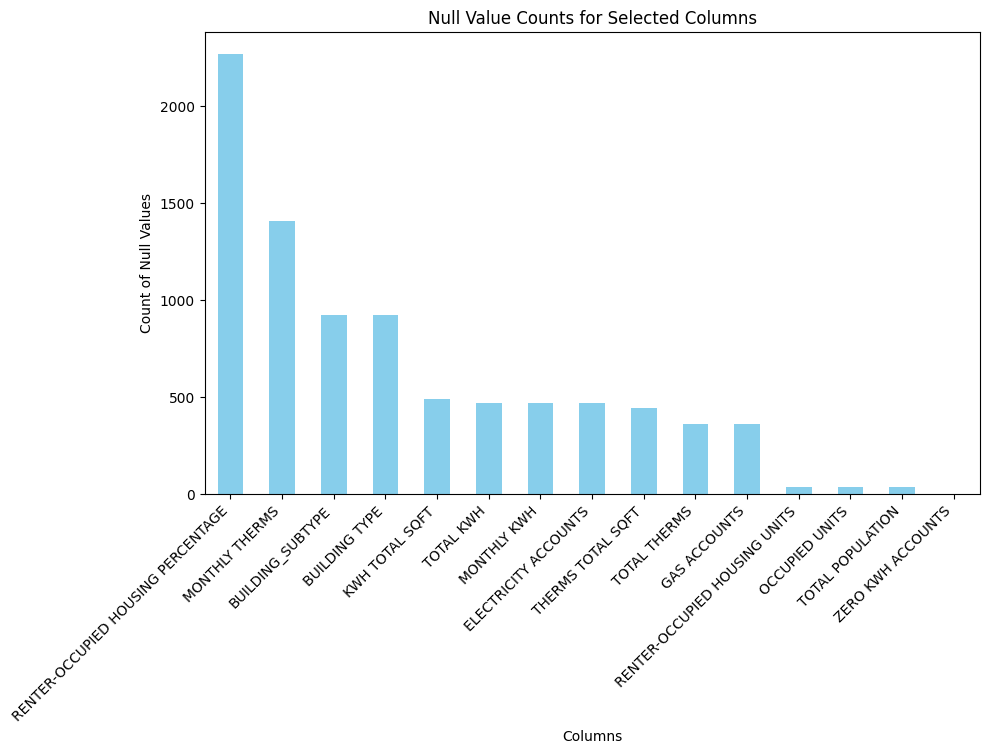

In [100]:
import matplotlib.pyplot as plt

columns_to_remove_nulls = [
    'BUILDING TYPE', 'BUILDING_SUBTYPE', 'TOTAL KWH', 'TOTAL THERMS','MONTHLY KWH','MONTHLY THERMS',
    'ELECTRICITY ACCOUNTS', 'GAS ACCOUNTS', 'TOTAL POPULATION',
    'OCCUPIED UNITS', 'RENTER-OCCUPIED HOUSING UNITS',
    'RENTER-OCCUPIED HOUSING PERCENTAGE', 'ZERO KWH ACCOUNTS',
    'KWH TOTAL SQFT', 'THERMS TOTAL SQFT'
]

# Get the count of null values for the selected columns
null_counts = data_1[columns_to_remove_nulls].isnull().sum().sort_values(ascending=False)

# Plot the null counts in a bar graph
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='skyblue')
plt.title('Null Value Counts for Selected Columns')
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=45, ha='right')
plt.show()

We focused on removing nulls from key columns related to energy consumption, building type, and housing characteristics, as these are critical for accurate analysis and forecasting. Removing nulls from these columns ensures completeness and reliability in understanding energy patterns and optimizing consumption. Non-essential columns with missing values are left intact to preserve context without affecting the core analysis.

In [101]:
data_1 = data_1.dropna(subset=columns_to_remove_nulls)
print(data_1.shape)
data_1

(264534, 46)


,COMMUNITY AREA NAME,CENSUS BLOCK,Month,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,AVERAGE STORIES,BUILDING TYPE,BUILDING_SUBTYPE,ELECTRICITY ACCOUNTS,GAS ACCOUNTS,...,THERMS SQFT MINIMUM 2010,THERMS SQFT STANDARD DEVIATION 2010,THERMS TOTAL SQFT,TOTAL KWH,TOTAL POPULATION,TOTAL THERMS,TOTAL UNITS,ZERO KWH ACCOUNTS,MONTHLY KWH,MONTHLY THERMS
195,Lakeview,170310620001009.0000,1,0.0000,2.1500,1.0000,Residential,Single Family,5,4,...,2387.0000,NaN,2387.0000,31686.0000,43.0000,3634.0000,20.0000,3,1697.0000,825.0000
196,Lakeview,170310620001009.0000,2,0.0000,2.1500,1.0000,Residential,Single Family,5,4,...,2387.0000,NaN,2387.0000,31686.0000,43.0000,3634.0000,20.0000,3,1663.0000,669.0000
197,Lakeview,170310620001009.0000,3,0.0000,2.1500,1.0000,Residential,Single Family,5,4,...,2387.0000,NaN,2387.0000,31686.0000,43.0000,3634.0000,20.0000,3,1677.0000,621.0000
198,Lakeview,170310620001009.0000,4,0.0000,2.1500,1.0000,Residential,Single Family,5,4,...,2387.0000,NaN,2387.0000,31686.0000,43.0000,3634.0000,20.0000,3,1497.0000,349.0000
199,Lakeview,170310620001009.0000,5,0.0000,2.1500,1.0000,Residential,Single Family,5,4,...,2387.0000,NaN,2387.0000,31686.0000,43.0000,3634.0000,20.0000,3,2809.0000,220.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337087,Woodlawn,170318439002011.0000,8,0.0000,3.1400,1.0000,Residential,Single Family,6,9,...,2890.0000,1429.0600,7801.0000,27654.0000,116.0000,10769.0000,55.0000,7,2351.0000,67.0000
337088,Woodlawn,170318439002011.0000,9,0.0000,3.1400,1.0000,Residential,Single Family,6,9,...,2890.0000,1429.0600,7801.0000,27654.0000,116.0000,10769.0000,55.0000,7,1213.0000,77.0000
337089,Woodlawn,170318439002011.0000,10,0.0000,3.1400,1.0000,Residential,Single Family,6,9,...,2890.0000,1429.0600,7801.0000,27654.0000,116.0000,10769.0000,55.0000,7,2174.0000,185.0000
337090,Woodlawn,170318439002011.0000,11,0.0000,3.1400,1.0000,Residential,Single Family,6,9,...,2890.0000,1429.0600,7801.0000,27654.0000,116.0000,10769.0000,55.0000,7,2888.0000,623.0000


Checking for null values presence in the selected columns:

In [102]:
null_matrix = data_1[columns_to_remove_nulls].isnull().sum()
null_matrix

,0
BUILDING TYPE,0
BUILDING_SUBTYPE,0
TOTAL KWH,0
TOTAL THERMS,0
MONTHLY KWH,0
MONTHLY THERMS,0
ELECTRICITY ACCOUNTS,0
GAS ACCOUNTS,0
TOTAL POPULATION,0
OCCUPIED UNITS,0


**Seasonal Variation in Energy Consumption:**

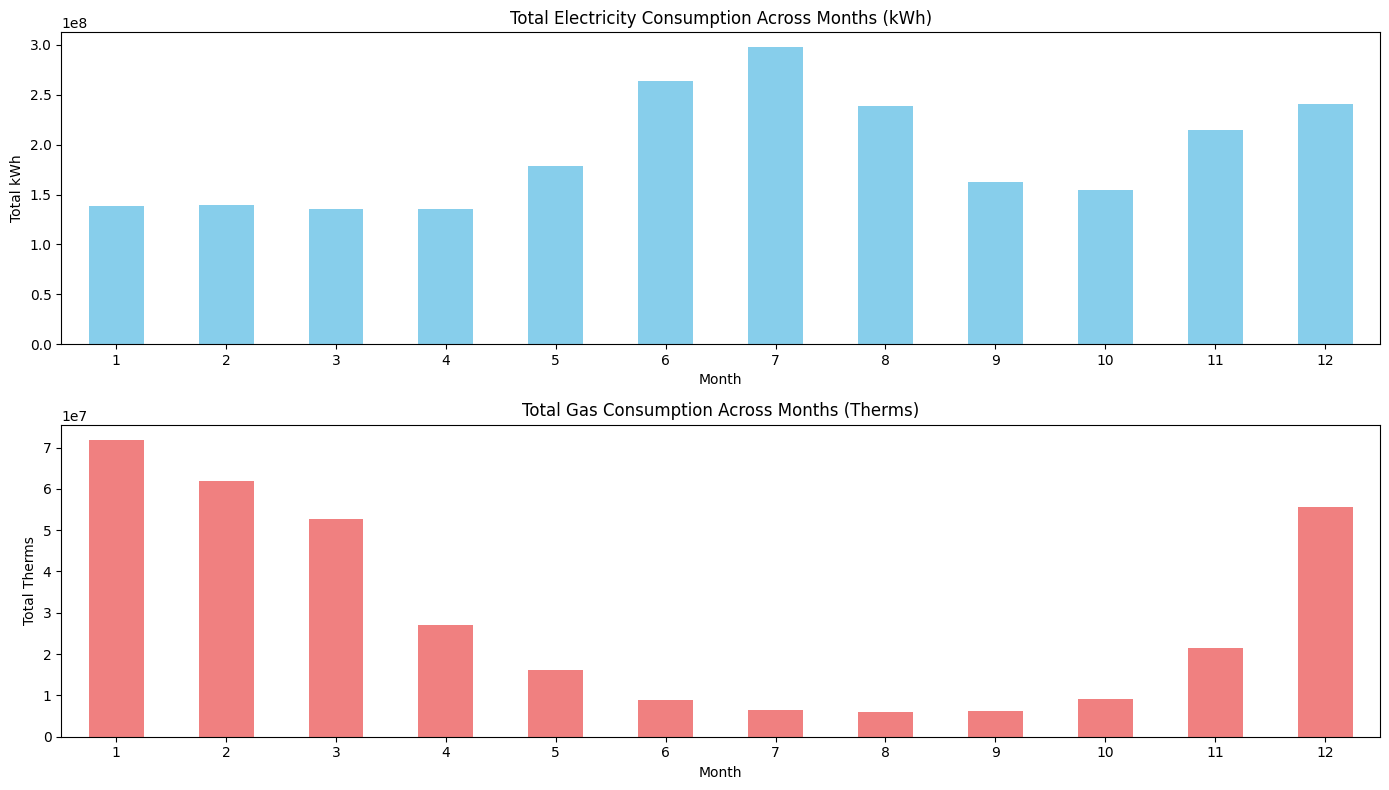

In [103]:
# prompt: from data_2 dataframe, a plot that shows trend of monthly KWH with respect to month numbers in month column

import matplotlib.pyplot as plt

total_electricity_consumption = data_1.groupby('Month')['MONTHLY KWH'].sum()
total_gas_consumption = data_1.groupby('Month')['MONTHLY THERMS'].sum()

# Create the plot
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
total_electricity_consumption.plot(kind='bar', color='skyblue')
# plt.plot(monthly_kwh_trend.index, monthly_kwh_trend.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.title('Total Electricity Consumption Across Months (kWh)')
plt.ylabel('Total kWh')
plt.xticks(rotation=0)


# Plot gas consumption
plt.subplot(2, 1, 2)
total_gas_consumption.plot(kind='bar', color='lightcoral')
plt.title('Total Gas Consumption Across Months (Therms)')
plt.xlabel('Month')
plt.ylabel('Total Therms')
plt.xticks(rotation=0)

# Adjust layout for better viewing
plt.tight_layout()
plt.show()


*   plot(a)The higher energy consumption(KWH) in July and June can be attributed to summer temperatures, prompting increased usage of air conditioning and cooling systems. Similarly, heightened energy demand in December and November is influenced by the seasonal need for heating during colder months, coupled with additional usage for festive decorations and increased building occupancy during holiday celebrations.
*   (plotb)During winter months (January to March) and especially in December, gas consumption peaks due to heightened heating needs driven by cold temperatures. Gas heating systems, such as gas furnaces, boilers, and water heaters, are prevalent for space heating and providing hot water.



       ELECTRICITY ACCOUNTS GAS ACCOUNTS
count                264534       264534
unique                   88           92
top                       5            6
freq                  18007        18772


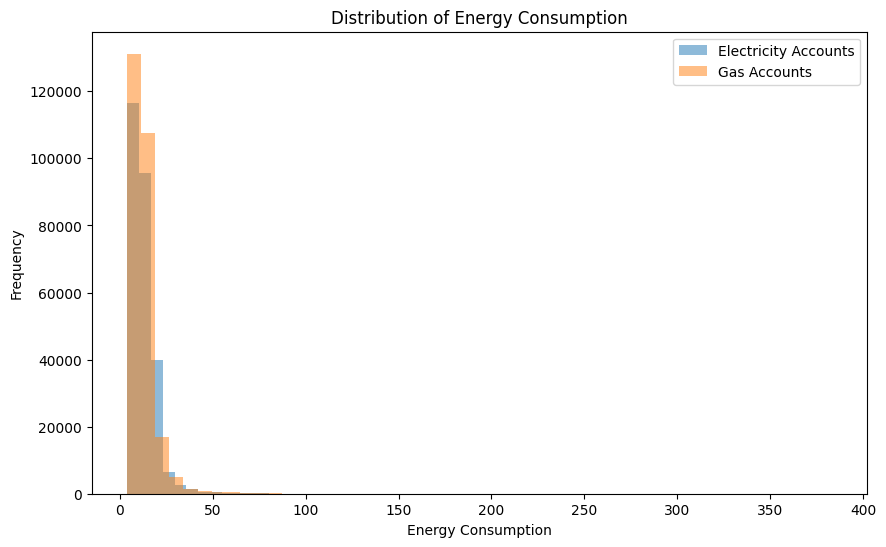

In [104]:
energy_columns = ['ELECTRICITY ACCOUNTS', 'GAS ACCOUNTS']

# Descriptive Statistics
energy_stats = data_1[energy_columns].describe()
print(energy_stats)
data_1[energy_columns] = data_1[energy_columns].apply(pd.to_numeric, errors='coerce')

# Distribution Comparison
plt.figure(figsize=(10, 6))
plt.hist(data_1['ELECTRICITY ACCOUNTS'], bins=50, alpha=0.5, label='Electricity Accounts')
plt.hist(data_1['GAS ACCOUNTS'], bins=50, alpha=0.5, label='Gas Accounts')
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [105]:
data_1

,COMMUNITY AREA NAME,CENSUS BLOCK,Month,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,AVERAGE STORIES,BUILDING TYPE,BUILDING_SUBTYPE,ELECTRICITY ACCOUNTS,GAS ACCOUNTS,...,THERMS SQFT MINIMUM 2010,THERMS SQFT STANDARD DEVIATION 2010,THERMS TOTAL SQFT,TOTAL KWH,TOTAL POPULATION,TOTAL THERMS,TOTAL UNITS,ZERO KWH ACCOUNTS,MONTHLY KWH,MONTHLY THERMS
195,Lakeview,170310620001009.0000,1,0.0000,2.1500,1.0000,Residential,Single Family,5,4,...,2387.0000,NaN,2387.0000,31686.0000,43.0000,3634.0000,20.0000,3,1697.0000,825.0000
196,Lakeview,170310620001009.0000,2,0.0000,2.1500,1.0000,Residential,Single Family,5,4,...,2387.0000,NaN,2387.0000,31686.0000,43.0000,3634.0000,20.0000,3,1663.0000,669.0000
197,Lakeview,170310620001009.0000,3,0.0000,2.1500,1.0000,Residential,Single Family,5,4,...,2387.0000,NaN,2387.0000,31686.0000,43.0000,3634.0000,20.0000,3,1677.0000,621.0000
198,Lakeview,170310620001009.0000,4,0.0000,2.1500,1.0000,Residential,Single Family,5,4,...,2387.0000,NaN,2387.0000,31686.0000,43.0000,3634.0000,20.0000,3,1497.0000,349.0000
199,Lakeview,170310620001009.0000,5,0.0000,2.1500,1.0000,Residential,Single Family,5,4,...,2387.0000,NaN,2387.0000,31686.0000,43.0000,3634.0000,20.0000,3,2809.0000,220.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337087,Woodlawn,170318439002011.0000,8,0.0000,3.1400,1.0000,Residential,Single Family,6,9,...,2890.0000,1429.0600,7801.0000,27654.0000,116.0000,10769.0000,55.0000,7,2351.0000,67.0000
337088,Woodlawn,170318439002011.0000,9,0.0000,3.1400,1.0000,Residential,Single Family,6,9,...,2890.0000,1429.0600,7801.0000,27654.0000,116.0000,10769.0000,55.0000,7,1213.0000,77.0000
337089,Woodlawn,170318439002011.0000,10,0.0000,3.1400,1.0000,Residential,Single Family,6,9,...,2890.0000,1429.0600,7801.0000,27654.0000,116.0000,10769.0000,55.0000,7,2174.0000,185.0000
337090,Woodlawn,170318439002011.0000,11,0.0000,3.1400,1.0000,Residential,Single Family,6,9,...,2890.0000,1429.0600,7801.0000,27654.0000,116.0000,10769.0000,55.0000,7,2888.0000,623.0000


In [106]:
#creating a new dataframe df2 with required columns
data_2= data_1[['TOTAL KWH', 'TOTAL THERMS','MONTHLY KWH', 'MONTHLY THERMS', 'Month','ELECTRICITY ACCOUNTS', 'GAS ACCOUNTS',  'TOTAL POPULATION','AVERAGE STORIES',
       'AVERAGE BUILDING AGE',  'THERMS TOTAL SQFT', 'TOTAL UNITS','ZERO KWH ACCOUNTS', 'OCCUPIED UNITS','OCCUPIED UNITS PERCENTAGE','AVERAGE HOUSESIZE','RENTER-OCCUPIED HOUSING UNITS'
       ,'RENTER-OCCUPIED HOUSING PERCENTAGE',  'KWH TOTAL SQFT']]

In [107]:
data_2['GAS ACCOUNTS'] = data_2['GAS ACCOUNTS'].astype(int)
data_2['ELECTRICITY ACCOUNTS'] = data_2['ELECTRICITY ACCOUNTS'].astype(int)

<ipython-input-107-5362c9a540ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['GAS ACCOUNTS'] = data_2['GAS ACCOUNTS'].astype(int)
<ipython-input-107-5362c9a540ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['ELECTRICITY ACCOUNTS'] = data_2['ELECTRICITY ACCOUNTS'].astype(int)


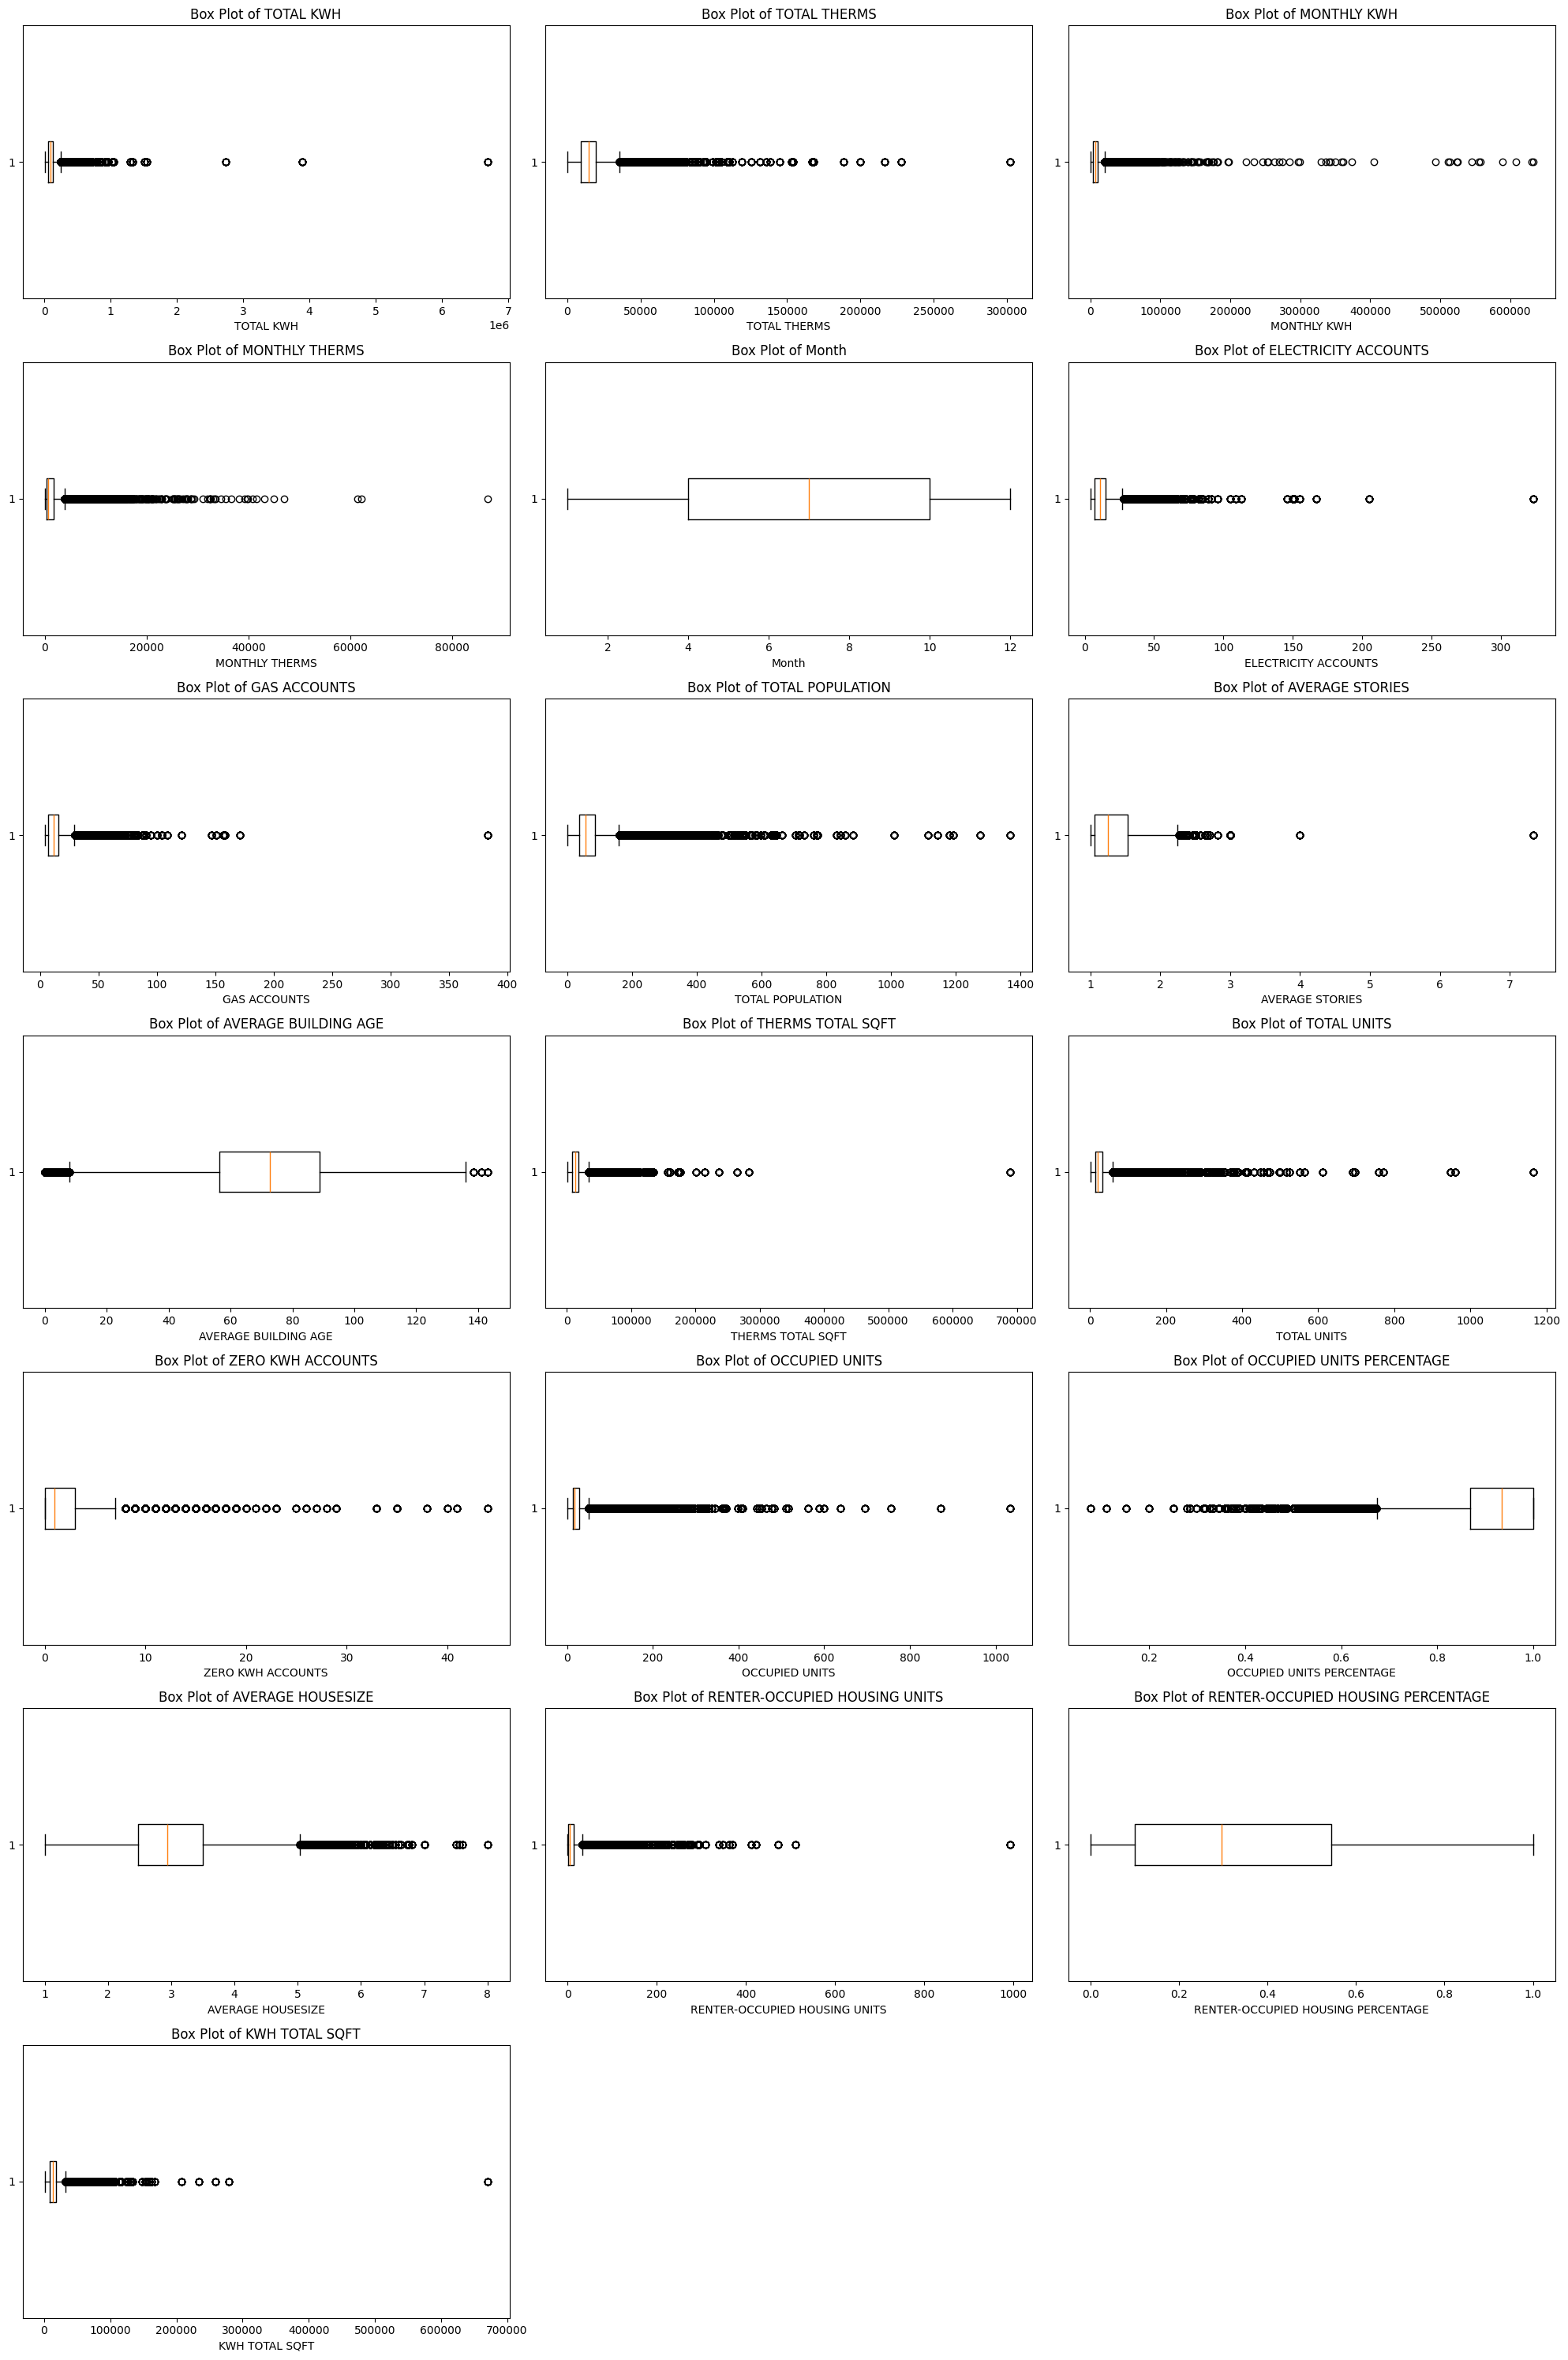

In [108]:
import matplotlib.pyplot as plt

# Columns to check for outliers
columns_to_check = [
    'TOTAL KWH', 'TOTAL THERMS','MONTHLY KWH', 'MONTHLY THERMS', 'Month',
    'ELECTRICITY ACCOUNTS', 'GAS ACCOUNTS','TOTAL POPULATION', 'AVERAGE STORIES',
    'AVERAGE BUILDING AGE','THERMS TOTAL SQFT', 'TOTAL UNITS', 'ZERO KWH ACCOUNTS',
    'OCCUPIED UNITS', 'OCCUPIED UNITS PERCENTAGE', 'AVERAGE HOUSESIZE',
    'RENTER-OCCUPIED HOUSING UNITS', 'RENTER-OCCUPIED HOUSING PERCENTAGE',
    'KWH TOTAL SQFT'
]

# Plot box plots for each column
plt.figure(figsize=(20, 30))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(7, 3, i)
    plt.boxplot(data_2[column].dropna(), vert=False)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


In [109]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5
    return column[(column >= Q1 - threshold * IQR) & (column <= Q3 + threshold * IQR)]

data_2 = data_2.apply(remove_outliers)

display(data_2)

null_counts = data_2.isnull().sum()

print("Number of null values in each column:")
display(null_counts)

,TOTAL KWH,TOTAL THERMS,MONTHLY KWH,MONTHLY THERMS,Month,ELECTRICITY ACCOUNTS,GAS ACCOUNTS,TOTAL POPULATION,AVERAGE STORIES,AVERAGE BUILDING AGE,THERMS TOTAL SQFT,TOTAL UNITS,ZERO KWH ACCOUNTS,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,AVERAGE HOUSESIZE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,KWH TOTAL SQFT
195,31686.0000,3634.0000,1697.0000,825.0000,1,5.0000,4.0000,43.0000,1.0000,NaN,2387.0000,20.0000,3.0000,20.0000,1.0000,2.1500,4.0000,0.2000,2387.0000
196,31686.0000,3634.0000,1663.0000,669.0000,2,5.0000,4.0000,43.0000,1.0000,NaN,2387.0000,20.0000,3.0000,20.0000,1.0000,2.1500,4.0000,0.2000,2387.0000
197,31686.0000,3634.0000,1677.0000,621.0000,3,5.0000,4.0000,43.0000,1.0000,NaN,2387.0000,20.0000,3.0000,20.0000,1.0000,2.1500,4.0000,0.2000,2387.0000
198,31686.0000,3634.0000,1497.0000,349.0000,4,5.0000,4.0000,43.0000,1.0000,NaN,2387.0000,20.0000,3.0000,20.0000,1.0000,2.1500,4.0000,0.2000,2387.0000
199,31686.0000,3634.0000,2809.0000,220.0000,5,5.0000,4.0000,43.0000,1.0000,NaN,2387.0000,20.0000,3.0000,20.0000,1.0000,2.1500,4.0000,0.2000,2387.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337087,27654.0000,10769.0000,2351.0000,67.0000,8,6.0000,9.0000,116.0000,1.0000,NaN,7801.0000,55.0000,7.0000,37.0000,NaN,3.1400,26.0000,0.7030,7801.0000
337088,27654.0000,10769.0000,1213.0000,77.0000,9,6.0000,9.0000,116.0000,1.0000,NaN,7801.0000,55.0000,7.0000,37.0000,NaN,3.1400,26.0000,0.7030,7801.0000
337089,27654.0000,10769.0000,2174.0000,185.0000,10,6.0000,9.0000,116.0000,1.0000,NaN,7801.0000,55.0000,7.0000,37.0000,NaN,3.1400,26.0000,0.7030,7801.0000
337090,27654.0000,10769.0000,2888.0000,623.0000,11,6.0000,9.0000,116.0000,1.0000,NaN,7801.0000,55.0000,7.0000,37.0000,NaN,3.1400,26.0000,0.7030,7801.0000


Number of null values in each column:


,0
TOTAL KWH,8335
TOTAL THERMS,6974
MONTHLY KWH,11733
MONTHLY THERMS,15902
Month,0
ELECTRICITY ACCOUNTS,7845
GAS ACCOUNTS,6455
TOTAL POPULATION,13689
AVERAGE STORIES,809
AVERAGE BUILDING AGE,11055


In [110]:
#Replacing null values with mean
def replace_null(col):
    col_mean = col.mean()
    return col.fillna(col_mean)

data_2 = data_2.apply(replace_null)

display(data_2)

null_counts = data_2.isnull().sum()

print("Number of null values in each column:")
display(null_counts)

,TOTAL KWH,TOTAL THERMS,MONTHLY KWH,MONTHLY THERMS,Month,ELECTRICITY ACCOUNTS,GAS ACCOUNTS,TOTAL POPULATION,AVERAGE STORIES,AVERAGE BUILDING AGE,THERMS TOTAL SQFT,TOTAL UNITS,ZERO KWH ACCOUNTS,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,AVERAGE HOUSESIZE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,KWH TOTAL SQFT
195,31686.0000,3634.0000,1697.0000,825.0000,1,5.0000,4.0000,43.0000,1.0000,74.7142,2387.0000,20.0000,3.0000,20.0000,1.0000,2.1500,4.0000,0.2000,2387.0000
196,31686.0000,3634.0000,1663.0000,669.0000,2,5.0000,4.0000,43.0000,1.0000,74.7142,2387.0000,20.0000,3.0000,20.0000,1.0000,2.1500,4.0000,0.2000,2387.0000
197,31686.0000,3634.0000,1677.0000,621.0000,3,5.0000,4.0000,43.0000,1.0000,74.7142,2387.0000,20.0000,3.0000,20.0000,1.0000,2.1500,4.0000,0.2000,2387.0000
198,31686.0000,3634.0000,1497.0000,349.0000,4,5.0000,4.0000,43.0000,1.0000,74.7142,2387.0000,20.0000,3.0000,20.0000,1.0000,2.1500,4.0000,0.2000,2387.0000
199,31686.0000,3634.0000,2809.0000,220.0000,5,5.0000,4.0000,43.0000,1.0000,74.7142,2387.0000,20.0000,3.0000,20.0000,1.0000,2.1500,4.0000,0.2000,2387.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337087,27654.0000,10769.0000,2351.0000,67.0000,8,6.0000,9.0000,116.0000,1.0000,74.7142,7801.0000,55.0000,7.0000,37.0000,0.9231,3.1400,26.0000,0.7030,7801.0000
337088,27654.0000,10769.0000,1213.0000,77.0000,9,6.0000,9.0000,116.0000,1.0000,74.7142,7801.0000,55.0000,7.0000,37.0000,0.9231,3.1400,26.0000,0.7030,7801.0000
337089,27654.0000,10769.0000,2174.0000,185.0000,10,6.0000,9.0000,116.0000,1.0000,74.7142,7801.0000,55.0000,7.0000,37.0000,0.9231,3.1400,26.0000,0.7030,7801.0000
337090,27654.0000,10769.0000,2888.0000,623.0000,11,6.0000,9.0000,116.0000,1.0000,74.7142,7801.0000,55.0000,7.0000,37.0000,0.9231,3.1400,26.0000,0.7030,7801.0000


Number of null values in each column:


,0
TOTAL KWH,0
TOTAL THERMS,0
MONTHLY KWH,0
MONTHLY THERMS,0
Month,0
ELECTRICITY ACCOUNTS,0
GAS ACCOUNTS,0
TOTAL POPULATION,0
AVERAGE STORIES,0
AVERAGE BUILDING AGE,0


In [111]:
# #performing Standardization to bring all data features to a common scale

# from sklearn.preprocessing import StandardScaler
# import pandas as pd

# scaler = StandardScaler()

# X_scaled = scaler.fit_transform(data_2)

# data_3= pd.DataFrame(X_scaled, columns=data_2.columns)

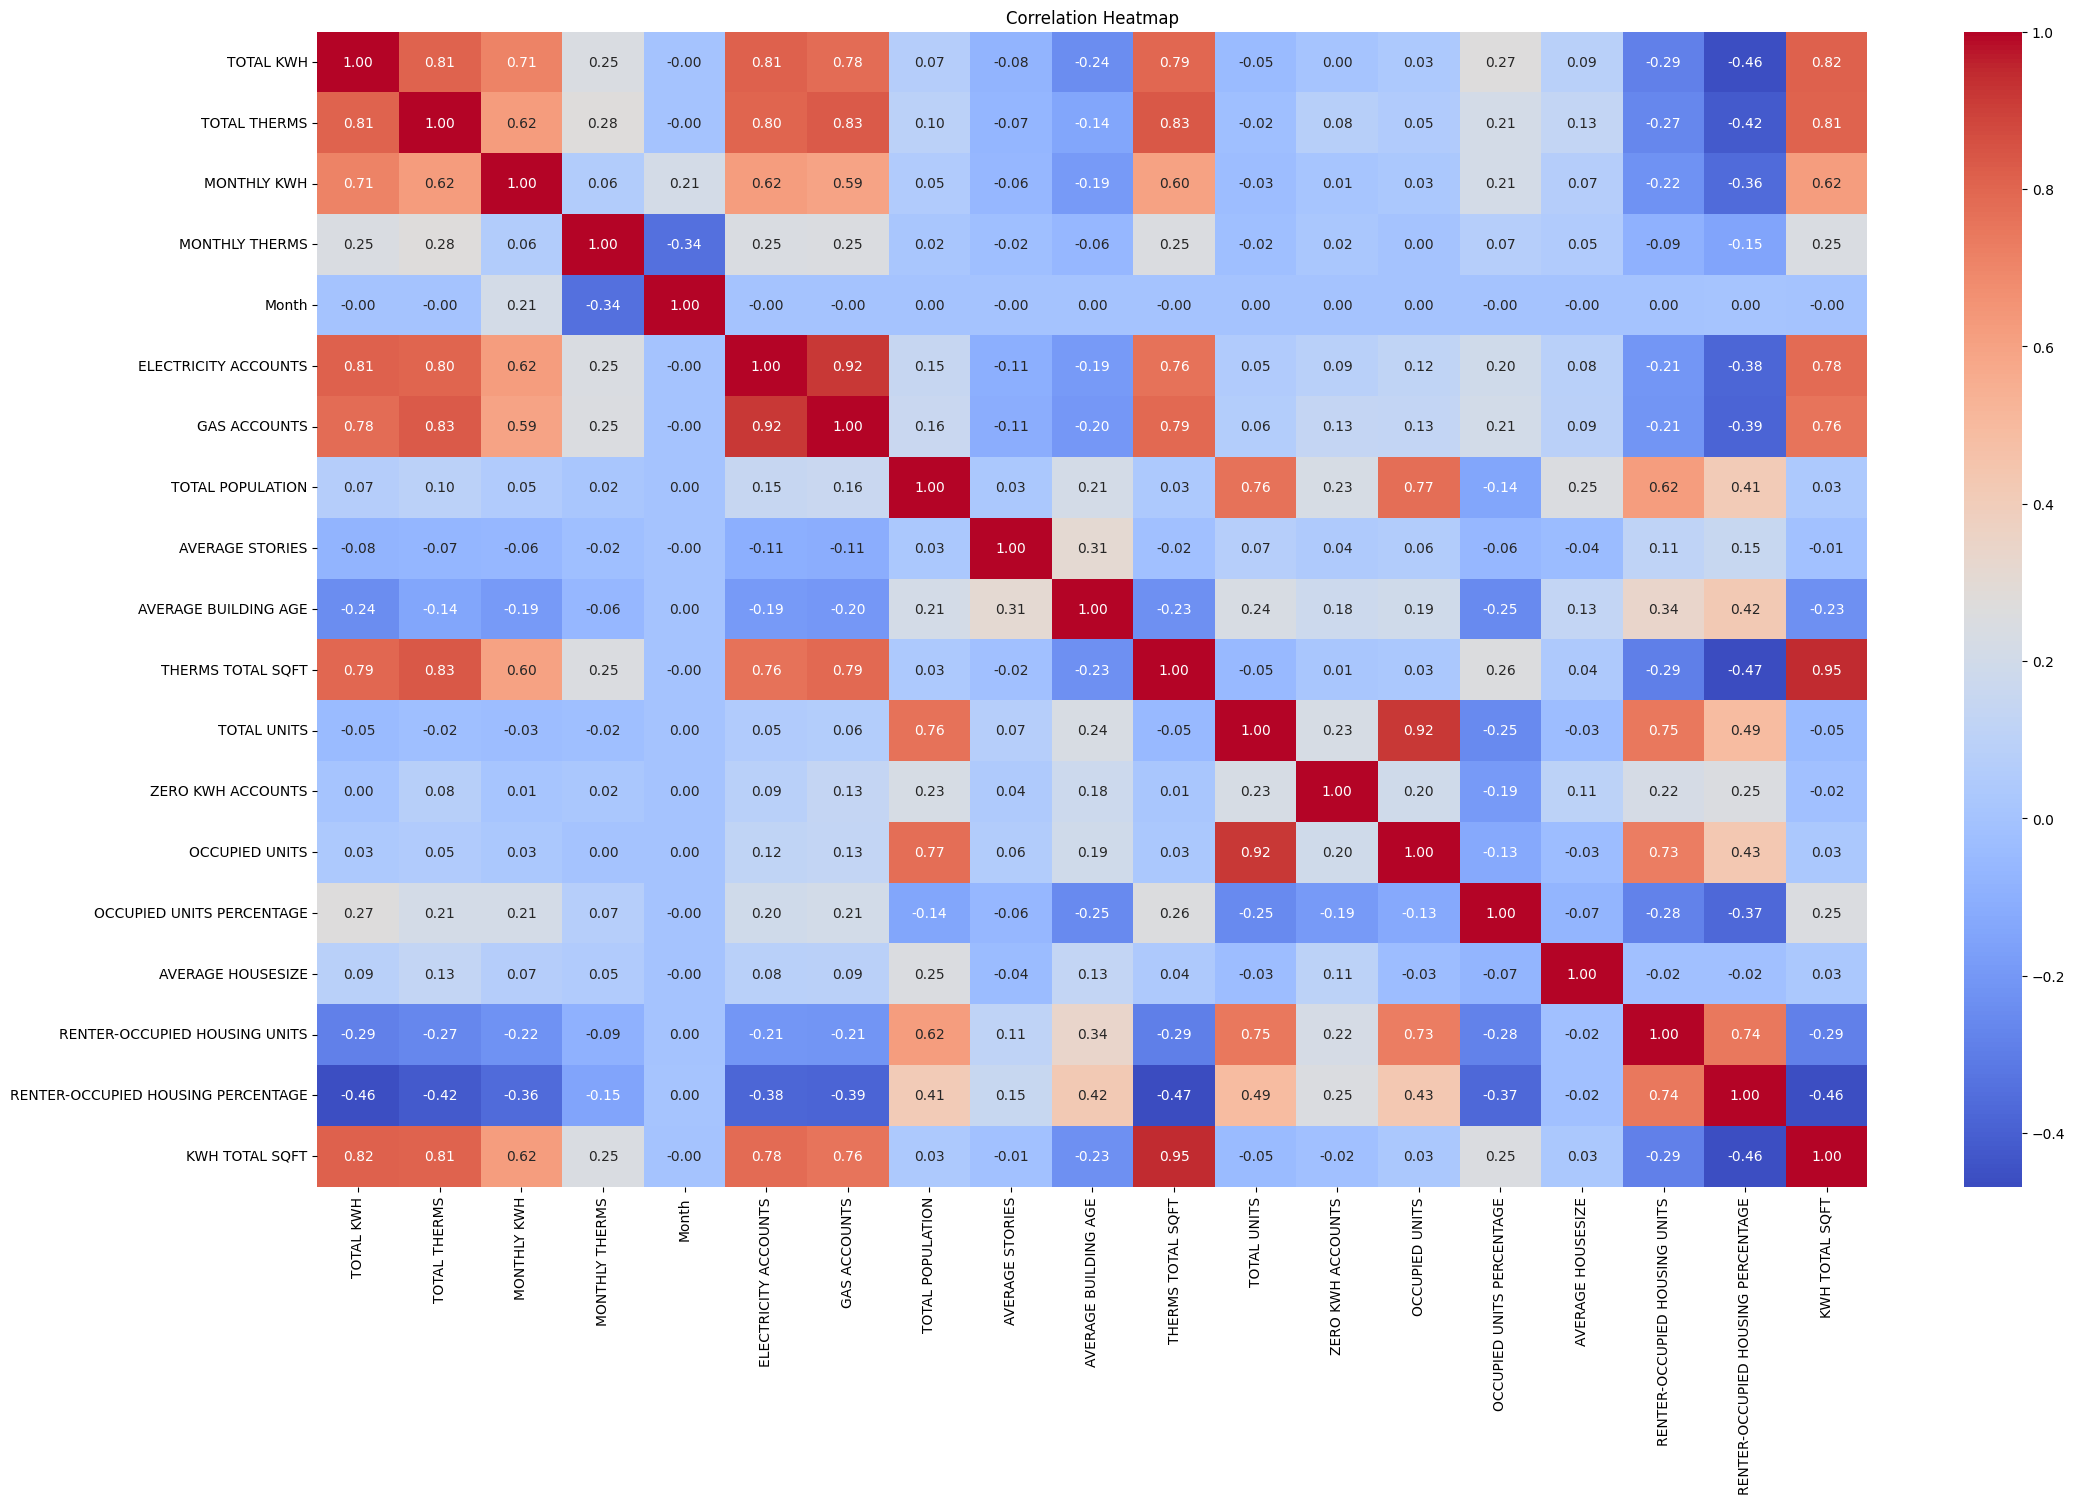

In [112]:
correlation_matrix = data_2.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [113]:
correlation_with_kwh = correlation_matrix['TOTAL KWH'].drop('TOTAL THERMS')
top_12_kwh = correlation_with_kwh.abs().sort_values(ascending=False).head(12)

correlation_with_therms = correlation_matrix['TOTAL THERMS'].drop('TOTAL KWH')
top_12_therms = correlation_with_therms.abs().sort_values(ascending=False).head(12)

print('Top 12 most correlated features for TOTAL KWH:\n', top_12_kwh)
print('Top 12 most correlated features for TOTAL THERMS:\n', top_12_therms)


Top 12 most correlated features for TOTAL KWH:
 TOTAL KWH                            1.0000
KWH TOTAL SQFT                       0.8155
ELECTRICITY ACCOUNTS                 0.8108
THERMS TOTAL SQFT                    0.7937
GAS ACCOUNTS                         0.7801
MONTHLY KWH                          0.7115
RENTER-OCCUPIED HOUSING PERCENTAGE   0.4587
RENTER-OCCUPIED HOUSING UNITS        0.2899
OCCUPIED UNITS PERCENTAGE            0.2714
MONTHLY THERMS                       0.2473
AVERAGE BUILDING AGE                 0.2444
AVERAGE HOUSESIZE                    0.0868
Name: TOTAL KWH, dtype: float64
Top 12 most correlated features for TOTAL THERMS:
 TOTAL THERMS                         1.0000
THERMS TOTAL SQFT                    0.8347
GAS ACCOUNTS                         0.8284
KWH TOTAL SQFT                       0.8107
ELECTRICITY ACCOUNTS                 0.8007
MONTHLY KWH                          0.6222
RENTER-OCCUPIED HOUSING PERCENTAGE   0.4200
MONTHLY THERMS                   

Based on correlation, below are the selected features:

In [114]:
data_4= data_2[['TOTAL KWH', 'TOTAL THERMS', 'MONTHLY KWH', 'MONTHLY THERMS', 'Month',
                'KWH TOTAL SQFT', 'ELECTRICITY ACCOUNTS', 'THERMS TOTAL SQFT', 'GAS ACCOUNTS',
                'RENTER-OCCUPIED HOUSING PERCENTAGE', 'RENTER-OCCUPIED HOUSING UNITS',
                'OCCUPIED UNITS PERCENTAGE', 'AVERAGE BUILDING AGE',
                'AVERAGE HOUSESIZE', 'AVERAGE STORIES', 'TOTAL POPULATION', 'ZERO KWH ACCOUNTS']]

**Checking for MultiCollinearity**

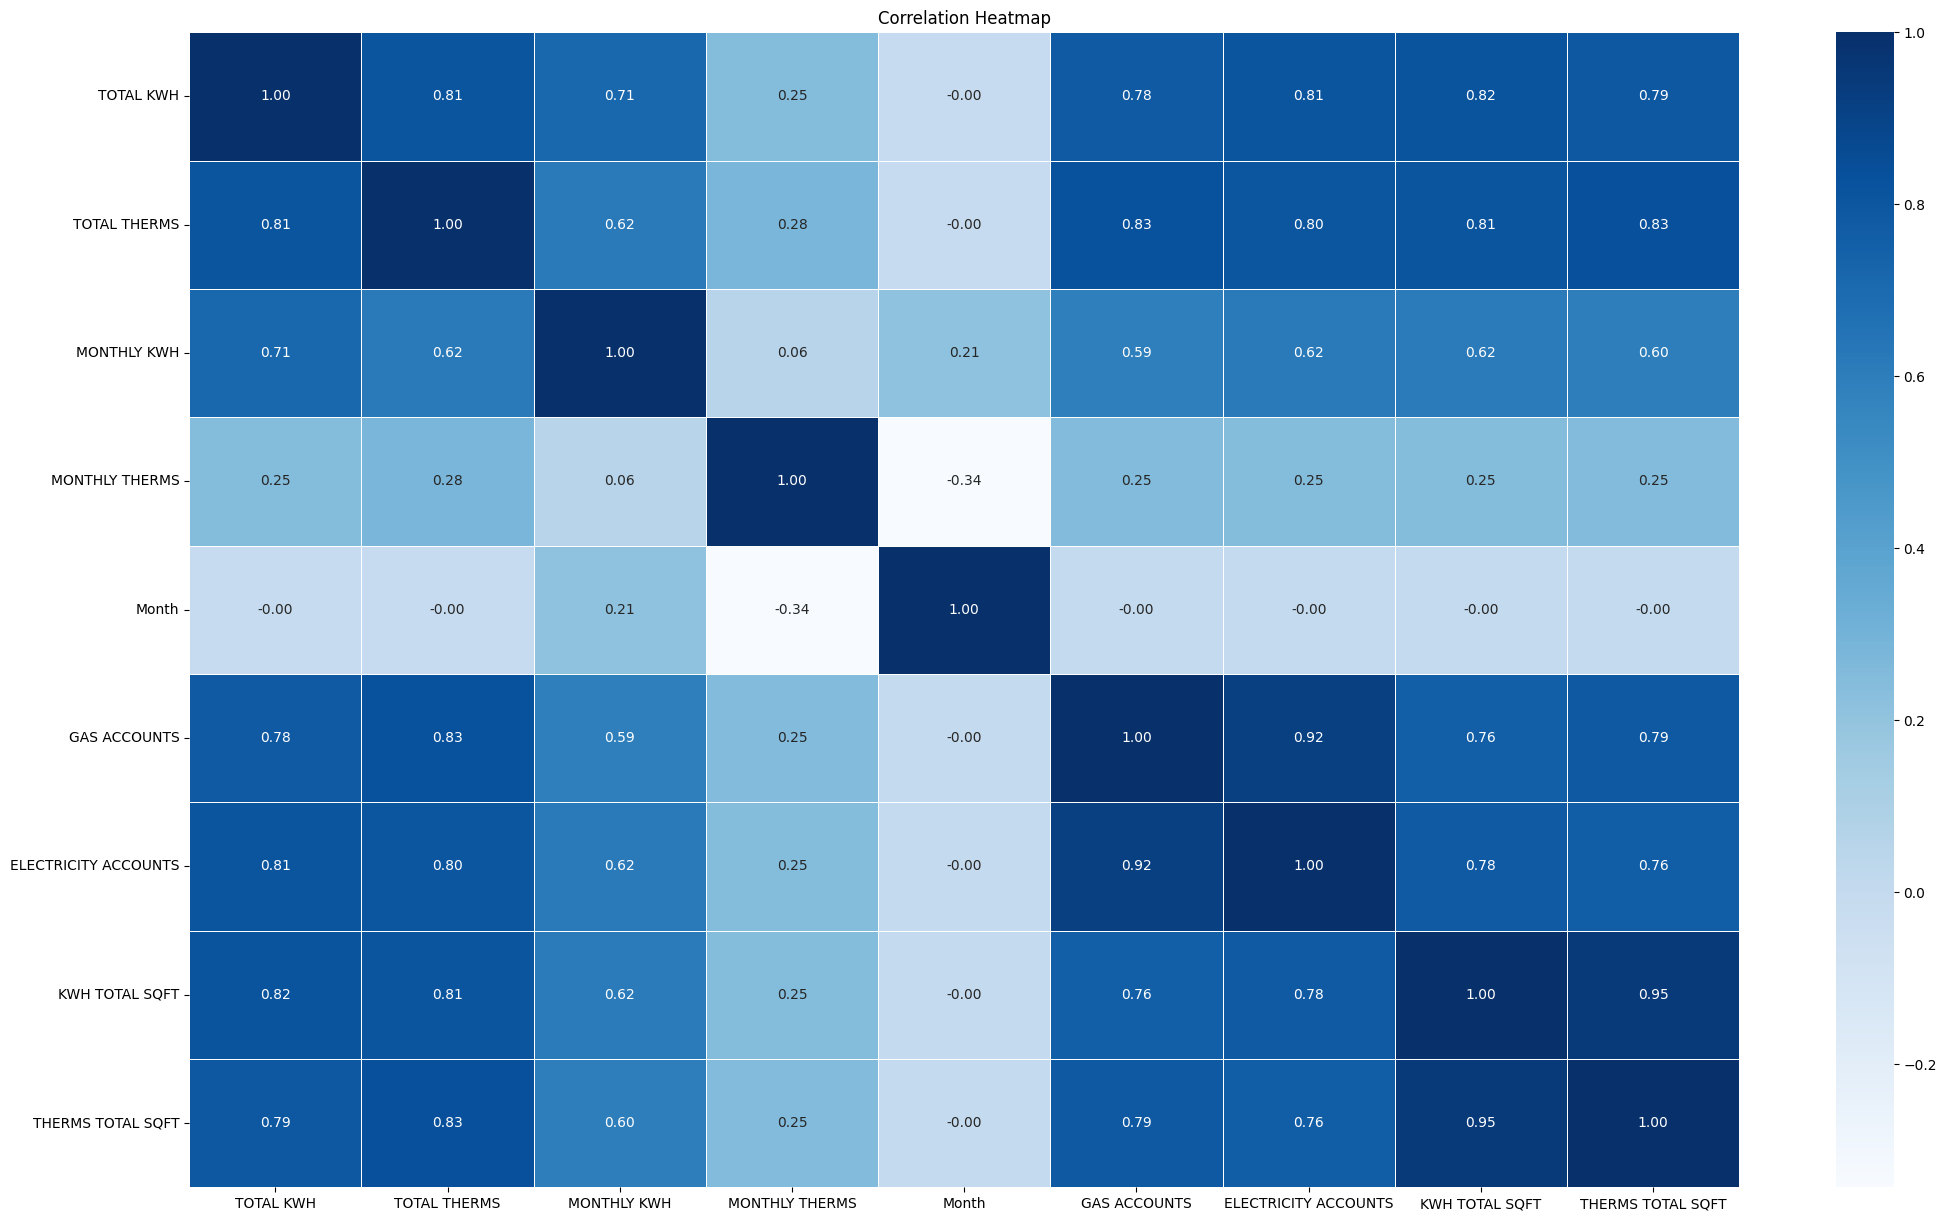

In [115]:
data_corr= data_4[['TOTAL KWH', 'TOTAL THERMS', 'MONTHLY KWH', 'MONTHLY THERMS', 'Month', 'GAS ACCOUNTS', 'ELECTRICITY ACCOUNTS', 'KWH TOTAL SQFT', 'THERMS TOTAL SQFT']]
correlation_matrix = data_corr.corr()
plt.figure(figsize=(25, 15))
#sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In the dataset, there is multicollinearity between several features,(i.e) some variables are highly correlated with each other, making it difficult to distinguish their individual effects on the target variables.


*  'ELECTRICITY ACCOUNTS' and 'GAS ACCOUNTS' have a high correlation (0.92). Including both in the model would create redundancy.
'TOTAL KWH' and 'TOTAL THERMS' are strongly correlated with 'ELECTRICITY ACCOUNTS' and 'GAS ACCOUNTS', so these features may overlap in terms of predictive power.
*   'KWH TOTAL SQFT' and 'THERMS TOTAL SQFT' are also highly correlated (0.95), and including both could lead to multicollinearity.


To mitigate this, we decide to remove 'GAS ACCOUNTS' and 'THERMS TOTAL SQFT'. This reduces redundancy, improves model interpretability, and prevents overfitting while maintaining predictive power.

**To check whether the changes applied:**

In [116]:
data_4= data_4.drop(columns=['GAS ACCOUNTS', 'THERMS TOTAL SQFT'])
display(data_4.head(5))
data_5= data_4.copy(deep=True)

,TOTAL KWH,TOTAL THERMS,MONTHLY KWH,MONTHLY THERMS,Month,KWH TOTAL SQFT,ELECTRICITY ACCOUNTS,RENTER-OCCUPIED HOUSING PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,OCCUPIED UNITS PERCENTAGE,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,AVERAGE STORIES,TOTAL POPULATION,ZERO KWH ACCOUNTS
195,31686.0000,3634.0000,1697.0000,825.0000,1,2387.0000,5.0000,0.2000,4.0000,1.0000,74.7142,2.1500,1.0000,43.0000,3.0000
196,31686.0000,3634.0000,1663.0000,669.0000,2,2387.0000,5.0000,0.2000,4.0000,1.0000,74.7142,2.1500,1.0000,43.0000,3.0000
197,31686.0000,3634.0000,1677.0000,621.0000,3,2387.0000,5.0000,0.2000,4.0000,1.0000,74.7142,2.1500,1.0000,43.0000,3.0000
198,31686.0000,3634.0000,1497.0000,349.0000,4,2387.0000,5.0000,0.2000,4.0000,1.0000,74.7142,2.1500,1.0000,43.0000,3.0000
199,31686.0000,3634.0000,2809.0000,220.0000,5,2387.0000,5.0000,0.2000,4.0000,1.0000,74.7142,2.1500,1.0000,43.0000,3.0000


In [117]:
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

data_4['Month'] = data_4['Month'].map(month_names)
data_4.head()

,TOTAL KWH,TOTAL THERMS,MONTHLY KWH,MONTHLY THERMS,Month,KWH TOTAL SQFT,ELECTRICITY ACCOUNTS,RENTER-OCCUPIED HOUSING PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,OCCUPIED UNITS PERCENTAGE,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,AVERAGE STORIES,TOTAL POPULATION,ZERO KWH ACCOUNTS
195,31686.0000,3634.0000,1697.0000,825.0000,January,2387.0000,5.0000,0.2000,4.0000,1.0000,74.7142,2.1500,1.0000,43.0000,3.0000
196,31686.0000,3634.0000,1663.0000,669.0000,February,2387.0000,5.0000,0.2000,4.0000,1.0000,74.7142,2.1500,1.0000,43.0000,3.0000
197,31686.0000,3634.0000,1677.0000,621.0000,March,2387.0000,5.0000,0.2000,4.0000,1.0000,74.7142,2.1500,1.0000,43.0000,3.0000
198,31686.0000,3634.0000,1497.0000,349.0000,April,2387.0000,5.0000,0.2000,4.0000,1.0000,74.7142,2.1500,1.0000,43.0000,3.0000
199,31686.0000,3634.0000,2809.0000,220.0000,May,2387.0000,5.0000,0.2000,4.0000,1.0000,74.7142,2.1500,1.0000,43.0000,3.0000


In [119]:
X

,Month,KWH TOTAL SQFT,ELECTRICITY ACCOUNTS,RENTER-OCCUPIED HOUSING PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,OCCUPIED UNITS PERCENTAGE,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,AVERAGE STORIES,TOTAL POPULATION,ZERO KWH ACCOUNTS
195,January,2387.0000,5.0000,0.2000,4.0000,1.0000,74.7142,2.1500,1.0000,43.0000,3.0000
196,February,2387.0000,5.0000,0.2000,4.0000,1.0000,74.7142,2.1500,1.0000,43.0000,3.0000
197,March,2387.0000,5.0000,0.2000,4.0000,1.0000,74.7142,2.1500,1.0000,43.0000,3.0000
198,April,2387.0000,5.0000,0.2000,4.0000,1.0000,74.7142,2.1500,1.0000,43.0000,3.0000
199,May,2387.0000,5.0000,0.2000,4.0000,1.0000,74.7142,2.1500,1.0000,43.0000,3.0000
...,...,...,...,...,...,...,...,...,...,...,...
337087,August,7801.0000,6.0000,0.7030,26.0000,0.9231,74.7142,3.1400,1.0000,116.0000,7.0000
337088,September,7801.0000,6.0000,0.7030,26.0000,0.9231,74.7142,3.1400,1.0000,116.0000,7.0000
337089,October,7801.0000,6.0000,0.7030,26.0000,0.9231,74.7142,3.1400,1.0000,116.0000,7.0000
337090,November,7801.0000,6.0000,0.7030,26.0000,0.9231,74.7142,3.1400,1.0000,116.0000,7.0000


We are dividing our dataset into training (75%) and testing (25%) sets in this step. The two target variables, "TOTAL KWH" and "TOTAL THERMS,"and other features as input variables


In [121]:
from sklearn.model_selection import train_test_split

# Assuming data_4 is your dataset (with all columns)
# Separating target variables and features
X = data_4.drop(['TOTAL KWH', 'TOTAL THERMS','MONTHLY KWH', 'MONTHLY THERMS'], axis=1)  # Features (input variables)
y = data_4[['TOTAL KWH', 'TOTAL THERMS','MONTHLY KWH', 'MONTHLY THERMS']]  # Target variables

# Splitting data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Check the shapes of the split data
print("Training data shape (X_train):", X_train.shape)
print("Testing data shape (X_test):", X_test.shape)
print("Training target shape (y_train):", y_train.shape)
print("Testing target shape (y_test):", y_test.shape)

Training data shape (X_train): (198400, 11)
Testing data shape (X_test): (66134, 11)
Training target shape (y_train): (198400, 4)
Testing target shape (y_test): (66134, 4)


In [122]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ohe = OneHotEncoder(drop='first')
scaler = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('OneHotEncode', ohe, ['Month']),
        ('standardscaler', scaler, ['KWH TOTAL SQFT', 'ELECTRICITY ACCOUNTS', 'RENTER-OCCUPIED HOUSING PERCENTAGE', 'RENTER-OCCUPIED HOUSING UNITS', 'OCCUPIED UNITS PERCENTAGE', \
                                    'AVERAGE BUILDING AGE', 'AVERAGE HOUSESIZE', 'AVERAGE STORIES', 'TOTAL POPULATION', 'ZERO KWH ACCOUNTS'])
    ], remainder='passthrough'
)

#  KWH TOTAL SQFT	ELECTRICITY ACCOUNTS	RENTER-OCCUPIED HOUSING PERCENTAGE	RENTER-OCCUPIED HOUSING UNITS	OCCUPIED UNITS PERCENTAGE
# AVERAGE BUILDING AGE	AVERAGE HOUSESIZE	AVERAGE STORIES	TOTAL POPULATION	ZERO KWH ACCOUNTS

In [123]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.fit_transform(X_test)
print(X_train_transformed)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.01973377e-01
  -7.34816909e-01  1.27617393e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.13482854e-01
  -8.91432505e-01  1.27617393e-01]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 ... -7.77220466e-01
   3.02395738e+00 -6.04087254e-04]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -7.13304123e-01
   8.31339046e-01  1.27617393e-01]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.52646286e-01
   1.86500198e+00 -4.48117749e-01]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.49566511e-01
   1.39515519e+00  7.03352535e-01]]


In [124]:
preprocessor.get_feature_names_out()

array(['OneHotEncode__Month_August', 'OneHotEncode__Month_December',
       'OneHotEncode__Month_February', 'OneHotEncode__Month_January',
       'OneHotEncode__Month_July', 'OneHotEncode__Month_June',
       'OneHotEncode__Month_March', 'OneHotEncode__Month_May',
       'OneHotEncode__Month_November', 'OneHotEncode__Month_October',
       'OneHotEncode__Month_September', 'standardscaler__KWH TOTAL SQFT',
       'standardscaler__ELECTRICITY ACCOUNTS',
       'standardscaler__RENTER-OCCUPIED HOUSING PERCENTAGE',
       'standardscaler__RENTER-OCCUPIED HOUSING UNITS',
       'standardscaler__OCCUPIED UNITS PERCENTAGE',
       'standardscaler__AVERAGE BUILDING AGE',
       'standardscaler__AVERAGE HOUSESIZE',
       'standardscaler__AVERAGE STORIES',
       'standardscaler__TOTAL POPULATION',
       'standardscaler__ZERO KWH ACCOUNTS'], dtype=object)

In [125]:
X_train.head(2)

,Month,KWH TOTAL SQFT,ELECTRICITY ACCOUNTS,RENTER-OCCUPIED HOUSING PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,OCCUPIED UNITS PERCENTAGE,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,AVERAGE STORIES,TOTAL POPULATION,ZERO KWH ACCOUNTS
241898,September,18888.0000,16.0000,0.1880,3.0000,0.9412,87.0700,2.3800,1.2700,38.0000,2.0000
262622,March,4815.0000,5.0000,0.5000,4.0000,0.8889,94.8000,4.1300,1.4000,33.0000,2.0000


In [126]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd

In [127]:
models = {
    'Linear Regression': LinearRegression(),
    # 'Multioutput Regression' : MultiOutputRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

for name, md in models.items():
  md.fit(X_train_transformed, y_train)
  y_pred = md.predict(X_test_transformed)
  r2_test_kwh = r2_score(y_test['TOTAL KWH'], y_pred[:, 0])
  r2_test_therms = r2_score(y_test['TOTAL THERMS'], y_pred[:, 1])
  r2_test_Month_kwh = r2_score(y_test['MONTHLY KWH'], y_pred[:, 2])
  r2_test_Month_therms = r2_score(y_test['MONTHLY THERMS'], y_pred[:, 3])

  print(f"{name}:",r2_test_kwh,r2_test_therms,r2_test_Month_kwh,r2_test_Month_therms)

  # print(mean_absolute_error(y_test, y_pred))



Linear Regression: 0.7522850649311399 0.7440962202429431 0.56295835034296 0.6271799969650466
K-Nearest Neighbors: 0.8365188249523634 0.8485657937203605 0.5878021303400613 0.6332793457535111
Decision Tree: 0.9740612605210092 0.9801802233474044 0.25787460419661035 -0.22545946581289877
Lasso: 0.752288381949203 0.7441050427341964 0.5629284517823555 0.6269104299717758
Ridge: 0.7522850639579836 0.7440962299482701 0.5629584688816733 0.6271799141939371


In [60]:
# r2_test_kwh = r2_score(y_test['TOTAL KWH'], y_pred[:, 0])
# # mse_test_kwh = mean_squared_error(y_test['TOTAL KWH'], y_pred[:, 0])
# r2_train_kwh = r2_score(y_test['TOTAL THERMS'], y_pred[:, 1])
# # mse_train_kwh = mean_squared_error(y_test['TOTAL KWH'], y_pred[:, 1])

# # Evaluate performance for 'MONTHLY KWH' (Third target variable)
# r2_test_Month_kwh = r2_score(y_test['MONTHLY KWH'], y_pred[:, 2])
# # mse_test_Month_kwh = mean_squared_error(y_test['MONTHLY KWH'], y_pred[:, 0])
# r2_train_Month_kwh = r2_score(y_test['MONTHLY THERMS'], y_pred[:, 3])
# # mse_train_Month_kwh = mean_squared_error(y_train['MONTHLY KWH'], y_pred[:, 0])
# print(r2_test_kwh,r2_train_kwh,r2_test_Month_kwh,r2_train_Month_kwh)


# # # Evaluate performance for 'MONTHLY THERMS' (Forth target variable)
# # r2_test_Month_therms = r2_score(y_test['MONTHLY THERMS'], y_pred_test[:, 1])
# # mse_test_Month_therms = mean_squared_error(y_test['MONTHLY THERMS'], y_pred_test[:, 1])
# # r2_train_Month_therms = r2_score(y_train['MONTHLY THERMS'], y_pred_train[:, 1])
# # mse_train_Month_therms = mean_squared_error(y_train['MONTHLY THERMS'], y_pred_train[:, 1])

From the dataset provided, all of the features and target variables appear to be continuous and represent numerical quantities. For example:

TOTAL KWH and TOTAL THERMS represent energy usage and consumption.
KWH TOTAL SQFT and THERMS TOTAL SQFT are measures of energy usage per square foot, which are also continuous.

Because these are continuous variables, it makes more sense to predict them using regression models.

***Mean Squared error (MSE)***

MSE is a measure of the average squared differences between the predicted values (y_pred) and the actual values (y_test). It quantifies how much the model's predictions deviate from the actual outcomes.

***R-squared (R²):***

R² measures the proportion of the variance in the target variable that is explained by the features in the model.It ranges from 0 to 1:

*  R² = 1 indicates that the model perfectly explains all the variance in the
target variable.
*  [link text](https://)R² = 0 indicates that the model does not explain any of the variance, and predictions are no better than simply predicting the mean of the target variable.

LINEAR REGRESSION:

In [128]:
pd.options.display.float_format = '{:.4f}'.format

In [129]:
Results_final=pd.DataFrame(columns=['Model','Metric','KWH Train Set','THERMS Train Set','Monthly KWH Train Set','Monthly THERMS Train Set',\
                                    'KWH Test Set','THERMS Test Set', 'Monthly KWH Test Set','Monthly THERMS Test Set'])
Results_final

,Model,Metric,KWH Train Set,THERMS Train Set,Monthly KWH Train Set,Monthly THERMS Train Set,KWH Test Set,THERMS Test Set,Monthly KWH Test Set,Monthly THERMS Test Set


In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd


# Initializing and training the multioutput regressor
base_regressor = LinearRegression()
multioutput_regressor = MultiOutputRegressor(base_regressor)
multioutput_regressor.fit(X_train_transformed, y_train)

# Making predictions
y_pred_test = multioutput_regressor.predict(X_test_transformed)  # Predictions for the test set
y_pred_train = multioutput_regressor.predict(X_train_transformed)  # Predictions for the training set

# Evaluate performance for 'TOTAL KWH' (first target variable)
r2_test_kwh = r2_score(y_test['TOTAL KWH'], y_pred_test[:, 0])
mse_test_kwh = mean_squared_error(y_test['TOTAL KWH'], y_pred_test[:, 0])
r2_train_kwh = r2_score(y_train['TOTAL KWH'], y_pred_train[:, 0])
mse_train_kwh = mean_squared_error(y_train['TOTAL KWH'], y_pred_train[:, 0])

# Evaluate performance for 'TOTAL THERMS' (second target variable)
r2_test_therms = r2_score(y_test['TOTAL THERMS'], y_pred_test[:, 1])
mse_test_therms = mean_squared_error(y_test['TOTAL THERMS'], y_pred_test[:, 1])
r2_train_therms = r2_score(y_train['TOTAL THERMS'], y_pred_train[:, 1])
mse_train_therms = mean_squared_error(y_train['TOTAL THERMS'], y_pred_train[:, 1])

# Evaluate performance for 'MONTHLY KWH' (Third target variable)
r2_test_Month_kwh = r2_score(y_test['MONTHLY KWH'], y_pred_test[:, 2])
mse_test_Month_kwh = mean_squared_error(y_test['MONTHLY KWH'], y_pred_test[:, 2])
r2_train_Month_kwh = r2_score(y_train['MONTHLY KWH'], y_pred_train[:, 2])
mse_train_Month_kwh = mean_squared_error(y_train['MONTHLY KWH'], y_pred_train[:, 2])

# Evaluate performance for 'MONTHLY THERMS' (Forth target variable)
r2_test_Month_therms = r2_score(y_test['MONTHLY THERMS'], y_pred_test[:, 3])
mse_test_Month_therms = mean_squared_error(y_test['MONTHLY THERMS'], y_pred_test[:, 3])
r2_train_Month_therms = r2_score(y_train['MONTHLY THERMS'], y_pred_train[:, 3])
mse_train_Month_therms = mean_squared_error(y_train['MONTHLY THERMS'], y_pred_train[:, 3])

# Summary of results in a DataFrame
results = pd.DataFrame({
    'Model': ['Linear Regression','Linear Regression'],
    'Metric': ['R-squared', 'MSE'],
    'KWH Train Set': [r2_train_kwh, mse_train_kwh],
    'THERMS Train Set': [r2_train_therms, mse_train_therms],
    'Monthly KWH Train Set': [r2_train_Month_kwh, mse_train_Month_kwh],
    'Monthly THERMS Train Set': [r2_train_Month_therms, mse_train_Month_therms],
    'KWH Test Set': [r2_test_kwh, mse_test_kwh],
    'THERMS Test Set': [r2_test_therms, mse_test_therms],
    'Monthly KWH Test Set': [r2_test_Month_kwh, mse_test_Month_kwh],
    'Monthly THERMS Test Set': [r2_test_Month_therms, mse_test_Month_therms],
})

# Rounding results for readability
results = results.round(4)
# Display the results
display(results)

Results_final = pd.concat([Results_final, results], ignore_index=True)


,Model,Metric,KWH Train Set,THERMS Train Set,Monthly KWH Train Set,Monthly THERMS Train Set,KWH Test Set,THERMS Test Set,Monthly KWH Test Set,Monthly THERMS Test Set
0,Linear Regression,R-squared,0.7548,0.7467,0.5665,0.6298,0.7523,0.7441,0.5630,0.6272
1,Linear Regression,MSE,539326720.6348,11750134.7472,8384068.6614,332225.2070,548822315.3429,11927647.9454,8470066.7139,336629.8564


<ipython-input-130-43ed4d412d0f>:60: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Results_final = pd.concat([Results_final, results], ignore_index=True)


The model is effective for predicting both TOTAL KWH and TOTAL THERMS.
The slightly higher R² and lower MSE for TOTAL KWH suggest the model performs marginally better for electricity usage than for therms usage.
Overall, the model is well-suited for making predictions on this dataset.

**Polynomial Regression**

In [132]:
## Takes around ~ 1mins with TPU instance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Define the degree of the polynomial
degree = 3  # You can experiment with different values for better performance

# Creating a pipeline for Polynomial Regression
poly_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
    ('linear_regression', LinearRegression())
])

# Wrap the pipeline in a MultiOutputRegressor to handle multiple outputs
multioutput_poly_regressor = MultiOutputRegressor(poly_pipeline)

# Fit the model to the training data
multioutput_poly_regressor.fit(X_train_transformed, y_train)

# Make predictions for the test and training sets
y_pred_test = multioutput_poly_regressor.predict(X_test_transformed)
y_pred_train = multioutput_poly_regressor.predict(X_train_transformed)

# Evaluate performance for 'TOTAL KWH' (first target variable)
r2_test_kwh = r2_score(y_test['TOTAL KWH'], y_pred_test[:, 0])
mse_test_kwh = mean_squared_error(y_test['TOTAL KWH'], y_pred_test[:, 0])
r2_train_kwh = r2_score(y_train['TOTAL KWH'], y_pred_train[:, 0])
mse_train_kwh = mean_squared_error(y_train['TOTAL KWH'], y_pred_train[:, 0])

# Evaluate performance for 'TOTAL THERMS' (second target variable)
r2_test_therms = r2_score(y_test['TOTAL THERMS'], y_pred_test[:, 1])
mse_test_therms = mean_squared_error(y_test['TOTAL THERMS'], y_pred_test[:, 1])
r2_train_therms = r2_score(y_train['TOTAL THERMS'], y_pred_train[:, 1])
mse_train_therms = mean_squared_error(y_train['TOTAL THERMS'], y_pred_train[:, 1])

# Evaluate performance for 'MONTHLY KWH' (Third target variable)
r2_test_Month_kwh = r2_score(y_test['MONTHLY KWH'], y_pred_test[:, 2])
mse_test_Month_kwh = mean_squared_error(y_test['MONTHLY KWH'], y_pred_test[:, 2])
r2_train_Month_kwh = r2_score(y_train['MONTHLY KWH'], y_pred_train[:, 2])
mse_train_Month_kwh = mean_squared_error(y_train['MONTHLY KWH'], y_pred_train[:, 2])

# Evaluate performance for 'MONTHLY THERMS' (Forth target variable)
r2_test_Month_therms = r2_score(y_test['MONTHLY THERMS'], y_pred_test[:, 3])
mse_test_Month_therms = mean_squared_error(y_test['MONTHLY THERMS'], y_pred_test[:, 3])
r2_train_Month_therms = r2_score(y_train['MONTHLY THERMS'], y_pred_train[:, 3])
mse_train_Month_therms = mean_squared_error(y_train['MONTHLY THERMS'], y_pred_train[:, 3])

# Summary of results in a DataFrame
results = pd.DataFrame({
    'Model': ['Polynomial Regression','Polynomial Regression'],
    'Metric': ['R-squared', 'MSE'],
    'KWH Train Set': [r2_train_kwh, mse_train_kwh],
    'THERMS Train Set': [r2_train_therms, mse_train_therms],
    'Monthly KWH Train Set': [r2_train_Month_kwh, mse_train_Month_kwh],
    'Monthly THERMS Train Set': [r2_train_Month_therms, mse_train_Month_therms],
    'KWH Test Set': [r2_test_kwh, mse_test_kwh],
    'THERMS Test Set': [r2_test_therms, mse_test_therms],
    'Monthly KWH Test Set': [r2_test_Month_kwh, mse_test_Month_kwh],
    'Monthly THERMS Test Set': [r2_test_Month_therms, mse_test_Month_therms],
})

# Rounding results for readability
results = results.round(4)

# Display the results
display(results)

Results_final = pd.concat([Results_final, results], ignore_index=True)


,Model,Metric,KWH Train Set,THERMS Train Set,Monthly KWH Train Set,Monthly THERMS Train Set,KWH Test Set,THERMS Test Set,Monthly KWH Test Set,Monthly THERMS Test Set
0,Polynomial Regression,R-squared,0.7757,0.7783,0.6309,0.7366,0.7706,0.7722,0.6260,0.7333
1,Polynomial Regression,MSE,493345932.2199,10282629.8490,7138092.5245,236391.8968,508247226.8494,10619391.1216,7248024.0725,240795.8337


**Observations:**

***R-squared (Higher is better):***

Train Set: Polynomial Regression (0.7762) > Linear Regression (0.7494)

Test Set: Polynomial Regression (0.7699) > Linear Regression (0.7531)

Conclusion: Polynomial Regression captures more variance in the data, suggesting it fits better.

***MSE (Lower is better):***

Train Set: Polynomial Regression (0.2247) < Linear Regression (0.2516)

Test Set: Polynomial Regression (0.2273) < Linear Regression (0.2439)

Conclusion: Polynomial Regression has lower error, indicating better predictions.

***Conclusion:***

Polynomial Regression improves performance by capturing non-linear relationships in the data.
The difference between train and test metrics for both methods is small, suggesting low overfitting in Polynomial Regression.
While Polynomial Regression adds complexity, it delivers meaningful improvements over Linear Regression in this case.

**Decision Tree**

In [65]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Step 1: Initialize the base Decision Tree Regressor
base_regressor_dt = DecisionTreeRegressor(random_state=42, max_depth=10)

# Step 2: Wrap the base regressor in MultiOutputRegressor
multioutput_regressor_dt = MultiOutputRegressor(base_regressor_dt)

# Step 3: Train the model on the training data
multioutput_regressor_dt.fit(X_train_transformed, y_train)

# Step 4: Make predictions for training and test sets
y_pred_train = multioutput_regressor_dt.predict(X_train_transformed)
y_pred_test = multioutput_regressor_dt.predict(X_test_transformed)

# Step 5: Evaluate the model for each target variable

# Evaluate performance for 'TOTAL KWH' (first target variable)
r2_test_kwh = r2_score(y_test['TOTAL KWH'], y_pred_test[:, 0])
mse_test_kwh = mean_squared_error(y_test['TOTAL KWH'], y_pred_test[:, 0])
r2_train_kwh = r2_score(y_train['TOTAL KWH'], y_pred_train[:, 0])
mse_train_kwh = mean_squared_error(y_train['TOTAL KWH'], y_pred_train[:, 0])

# Evaluate performance for 'TOTAL THERMS' (second target variable)
r2_test_therms = r2_score(y_test['TOTAL THERMS'], y_pred_test[:, 1])
mse_test_therms = mean_squared_error(y_test['TOTAL THERMS'], y_pred_test[:, 1])
r2_train_therms = r2_score(y_train['TOTAL THERMS'], y_pred_train[:, 1])
mse_train_therms = mean_squared_error(y_train['TOTAL THERMS'], y_pred_train[:, 1])

# Evaluate performance for 'MONTHLY KWH' (Third target variable)
r2_test_Month_kwh = r2_score(y_test['MONTHLY KWH'], y_pred_test[:, 2])
mse_test_Month_kwh = mean_squared_error(y_test['MONTHLY KWH'], y_pred_test[:, 2])
r2_train_Month_kwh = r2_score(y_train['MONTHLY KWH'], y_pred_train[:, 2])
mse_train_Month_kwh = mean_squared_error(y_train['MONTHLY KWH'], y_pred_train[:, 2])

# Evaluate performance for 'MONTHLY THERMS' (Forth target variable)
r2_test_Month_therms = r2_score(y_test['MONTHLY THERMS'], y_pred_test[:, 3])
mse_test_Month_therms = mean_squared_error(y_test['MONTHLY THERMS'], y_pred_test[:, 3])
r2_train_Month_therms = r2_score(y_train['MONTHLY THERMS'], y_pred_train[:, 3])
mse_train_Month_therms = mean_squared_error(y_train['MONTHLY THERMS'], y_pred_train[:, 3])

# Step 6: Create a DataFrame to summarize the results
results = pd.DataFrame({
    'Model': ['Decision Tree','Decision Tree'],
    'Metric': ['R-squared', 'MSE'],
    'KWH Train Set': [r2_train_kwh, mse_train_kwh],
    'THERMS Train Set': [r2_train_therms, mse_train_therms],
    'Monthly KWH Train Set': [r2_train_Month_kwh, mse_train_Month_kwh],
    'Monthly THERMS Train Set': [r2_train_Month_therms, mse_train_Month_therms],
    'KWH Test Set': [r2_test_kwh, mse_test_kwh],
    'THERMS Test Set': [r2_test_therms, mse_test_therms],
    'Monthly KWH Test Set': [r2_test_Month_kwh, mse_test_Month_kwh],
    'Monthly THERMS Test Set': [r2_test_Month_therms, mse_test_Month_therms],
})

# Round the results for better readability
results = results.round(4)

# Print the evaluation results
display(results)

Results_final = pd.concat([Results_final, results], ignore_index=True)


,Model,Metric,KWH Train Set,THERMS Train Set,Monthly KWH Train Set,Monthly THERMS Train Set,KWH Test Set,THERMS Test Set,Monthly KWH Test Set,Monthly THERMS Test Set
0,Decision Tree,R-squared,0.8278,0.8405,0.6400,0.7264,0.8168,0.8278,0.6099,0.6895
1,Decision Tree,MSE,378718920.2637,7400159.7924,6962288.1899,245561.0352,405870045.5836,8028039.8887,7559842.4490,280340.2200


**Observations**

*  Training vs. Test Performance: The R² values are significantly higher on the training set compared to the test set.The MSE is much lower on the training set than the test set.This suggests overfitting, where the model captures noise in the training data and performs less effectively on unseen data.
* Test Set Performance: While the R² values on the test set are moderate (~0.69 for KWH and ~0.71 for THERMS), the model may not be capturing all patterns in the data effectively.
* Decision Tree Characteristics: Decision trees can overfit easily if not pruned or constrained with hyperparameters like max_depth, min_samples_split, or min_samples_leaf.

In [ ]:
# # Takes around ~ 20 mins with TPU instance
# # Import necessary libraries
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.multioutput import MultiOutputRegressor
# from sklearn.metrics import r2_score, mean_squared_error
# import pandas as pd

# # Step 1: Define the parameter distribution for RandomizedSearchCV
# param_dist = {
#     'estimator__max_depth': [3, 5, 10, None],  # Possible depths of the tree
#     'estimator__min_samples_split': [2, 5, 10],  # Min samples to split
#     'estimator__min_samples_leaf': [1, 2, 4],  # Min samples at leaf node
#     'estimator__criterion': ['squared_error', 'friedman_mse', 'absolute_error'],  # Split criterion
#     'estimator__max_features': ['auto', 'sqrt', 'log2', None]  # Number of features to consider
# }

# # Step 2: Initialize the base Decision Tree Regressor
# base_regressor_dt = DecisionTreeRegressor(random_state=42)

# # Step 3: Wrap the base regressor in MultiOutputRegressor
# multioutput_regressor_dt = MultiOutputRegressor(base_regressor_dt)

# # Step 4: Initialize RandomizedSearchCV with 20 iterations
# random_search = RandomizedSearchCV(
#     estimator=multioutput_regressor_dt,
#     param_distributions=param_dist,
#     n_iter=20,  # Set the number of iterations to 20
#     cv=5,
#     scoring='neg_mean_squared_error',
#     n_jobs=-1,
#     verbose=2,
#     random_state=42
# )

# # Step 5: Train the model on the training data using RandomizedSearchCV
# random_search.fit(X_train_transformed, y_train)

# # Step 6: Get the best model found by RandomizedSearchCV
# best_multioutput_model = random_search.best_estimator_

# # Step 7: Make predictions for training and test sets using the best model
# y_pred_train = best_multioutput_model.predict(X_train_transformed)
# y_pred_test = best_multioutput_model.predict(X_test_transformed)

# # Step 8: Evaluate the model for each target variable

# # Evaluate performance for 'TOTAL KWH' (first target variable)
# r2_test_kwh = r2_score(y_test['TOTAL KWH'], y_pred_test[:, 0])
# mse_test_kwh = mean_squared_error(y_test['TOTAL KWH'], y_pred_test[:, 0])
# r2_train_kwh = r2_score(y_train['TOTAL KWH'], y_pred_train[:, 0])
# mse_train_kwh = mean_squared_error(y_train['TOTAL KWH'], y_pred_train[:, 0])

# # Evaluate performance for 'TOTAL THERMS' (second target variable)
# r2_test_therms = r2_score(y_test['TOTAL THERMS'], y_pred_test[:, 1])
# mse_test_therms = mean_squared_error(y_test['TOTAL THERMS'], y_pred_test[:, 1])
# r2_train_therms = r2_score(y_train['TOTAL THERMS'], y_pred_train[:, 1])
# mse_train_therms = mean_squared_error(y_train['TOTAL THERMS'], y_pred_train[:, 1])

# # Evaluate performance for 'MONTHLY KWH' (Third target variable)
# r2_test_Month_kwh = r2_score(y_test['MONTHLY KWH'], y_pred_test[:, 2])
# mse_test_Month_kwh = mean_squared_error(y_test['MONTHLY KWH'], y_pred_test[:, 2])
# r2_train_Month_kwh = r2_score(y_train['MONTHLY KWH'], y_pred_train[:, 2])
# mse_train_Month_kwh = mean_squared_error(y_train['MONTHLY KWH'], y_pred_train[:, 2])

# # Evaluate performance for 'MONTHLY THERMS' (Forth target variable)
# r2_test_Month_therms = r2_score(y_test['MONTHLY THERMS'], y_pred_test[:, 3])
# mse_test_Month_therms = mean_squared_error(y_test['MONTHLY THERMS'], y_pred_test[:, 3])
# r2_train_Month_therms = r2_score(y_train['MONTHLY THERMS'], y_pred_train[:, 3])
# mse_train_Month_therms = mean_squared_error(y_train['MONTHLY THERMS'], y_pred_train[:, 3])

# # Step 09: Create a DataFrame to summarize the results
# results = pd.DataFrame({
#     'Model': ['Randomized Search','Randomized Search'],
#     'Metric': ['R-squared', 'MSE'],
#     'KWH Train Set': [r2_train_kwh, mse_train_kwh],
#     'THERMS Train Set': [r2_train_therms, mse_train_therms],
#     'Monthly KWH Train Set': [r2_train_Month_kwh, mse_train_Month_kwh],
#     'Monthly THERMS Train Set': [r2_train_Month_therms, mse_train_Month_therms],
#     'KWH Test Set': [r2_test_kwh, mse_test_kwh],
#     'THERMS Test Set': [r2_test_therms, mse_test_therms],
#     'Monthly KWH Test Set': [r2_test_Month_kwh, mse_test_Month_kwh],
#     'Monthly THERMS Test Set': [r2_test_Month_therms, mse_test_Month_therms],
# })

# # Round the results for better readability
# results = results.round(4)

# # Print the evaluation results
# display(results)

# # Step 10: Print the best parameters found by RandomizedSearchCV
# print("Best parameters found by RandomizedSearchCV:", random_search.best_params_)


# Results_final = pd.concat([Results_final, results], ignore_index=True)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

R-squared values are relatively high (~0.75), indicating a good fit of the model to the data.
MSE values are also reasonably low, suggesting that the model's predictions are quite close to the true values.
The hyperparameters chosen by RandomizedSearchCV seem to work well for this problem, balancing complexity and performance.

**Randomn Forest:**

Random Forest is a machine learning method that uses many decision trees to make predictions. It combines the results of all these trees to give a final answer. This makes the model more accurate and reliable.

In [133]:
# Takes around ~ 5 mins with TPU instance
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Step 1: Initialize the base Random Forest Regressor
base_regressor_rf = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)

# Step 2: Wrap the base regressor in MultiOutputRegressor
multioutput_regressor_rf = MultiOutputRegressor(base_regressor_rf)

# Step 3: Train the Random Forest model on the training data
multioutput_regressor_rf.fit(X_train_transformed, y_train)

# Step 4: Make predictions for training and test sets
y_pred_train = multioutput_regressor_rf.predict(X_train_transformed)
y_pred_test = multioutput_regressor_rf.predict(X_test_transformed)

# Step 5: Evaluate the model for each target variable

# Evaluate performance for 'TOTAL KWH' (first target variable)
r2_test_kwh = r2_score(y_test['TOTAL KWH'], y_pred_test[:, 0])
mse_test_kwh = mean_squared_error(y_test['TOTAL KWH'], y_pred_test[:, 0])
r2_train_kwh = r2_score(y_train['TOTAL KWH'], y_pred_train[:, 0])
mse_train_kwh = mean_squared_error(y_train['TOTAL KWH'], y_pred_train[:, 0])

# Evaluate performance for 'TOTAL THERMS' (second target variable)
r2_test_therms = r2_score(y_test['TOTAL THERMS'], y_pred_test[:, 1])
mse_test_therms = mean_squared_error(y_test['TOTAL THERMS'], y_pred_test[:, 1])
r2_train_therms = r2_score(y_train['TOTAL THERMS'], y_pred_train[:, 1])
mse_train_therms = mean_squared_error(y_train['TOTAL THERMS'], y_pred_train[:, 1])

# Evaluate performance for 'MONTHLY KWH' (Third target variable)
r2_test_Month_kwh = r2_score(y_test['MONTHLY KWH'], y_pred_test[:, 2])
mse_test_Month_kwh = mean_squared_error(y_test['MONTHLY KWH'], y_pred_test[:, 2])
r2_train_Month_kwh = r2_score(y_train['MONTHLY KWH'], y_pred_train[:, 2])
mse_train_Month_kwh = mean_squared_error(y_train['MONTHLY KWH'], y_pred_train[:, 2])

# Evaluate performance for 'MONTHLY THERMS' (Forth target variable)
r2_test_Month_therms = r2_score(y_test['MONTHLY THERMS'], y_pred_test[:, 3])
mse_test_Month_therms = mean_squared_error(y_test['MONTHLY THERMS'], y_pred_test[:, 3])
r2_train_Month_therms = r2_score(y_train['MONTHLY THERMS'], y_pred_train[:, 3])
mse_train_Month_therms = mean_squared_error(y_train['MONTHLY THERMS'], y_pred_train[:, 3])

# Step 06: Create a DataFrame to summarize the results
results = pd.DataFrame({
    'Model': ['Randomn Forest','Randomn Forest'],
    'Metric': ['R-squared', 'MSE'],
    'KWH Train Set': [r2_train_kwh, mse_train_kwh],
    'THERMS Train Set': [r2_train_therms, mse_train_therms],
    'Monthly KWH Train Set': [r2_train_Month_kwh, mse_train_Month_kwh],
    'Monthly THERMS Train Set': [r2_train_Month_therms, mse_train_Month_therms],
    'KWH Test Set': [r2_test_kwh, mse_test_kwh],
    'THERMS Test Set': [r2_test_therms, mse_test_therms],
    'Monthly KWH Test Set': [r2_test_Month_kwh, mse_test_Month_kwh],
    'Monthly THERMS Test Set': [r2_test_Month_therms, mse_test_Month_therms],
})

# Round the results for better readability
results = results.round(4)

# Print the evaluation results
display(results)

Results_final = pd.concat([Results_final, results], ignore_index=True)


,Model,Metric,KWH Train Set,THERMS Train Set,Monthly KWH Train Set,Monthly THERMS Train Set,KWH Test Set,THERMS Test Set,Monthly KWH Test Set,Monthly THERMS Test Set
0,Randomn Forest,R-squared,0.8531,0.8634,0.6547,0.7415,0.8421,0.8524,0.6315,0.7077
1,Randomn Forest,MSE,323262258.0261,6338262.4513,6677050.0180,232029.1628,349902155.2855,6877670.6318,7141741.6467,263921.0516


**Comparison to Other Models:**


* Compared to Decision Tree results (R² Test: 0.6932 and 0.7053), Random Forest performs significantly better.
* It also seems to outperform Linear Regression (R² Test: 0.7631 and 0.7430) and Polynomial Regression (R² Test: 0.7731 and 0.7667).


**Gradient Boosting:**

In [134]:
# Takes around ~ 2mins with TPU instance
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Step 1: Initialize the base Gradient Boosting Regressor
base_regressor_gb = GradientBoostingRegressor(random_state=42)

# Step 2: Wrap the base regressor in MultiOutputRegressor to handle multiple target variables
multioutput_regressor_gb = MultiOutputRegressor(base_regressor_gb)

# Step 3: Train the model on the training data
multioutput_regressor_gb.fit(X_train_transformed, y_train)

# Step 4: Make predictions for training and test sets
y_pred_train = multioutput_regressor_gb.predict(X_train_transformed)
y_pred_test = multioutput_regressor_gb.predict(X_test_transformed)

# Step 5: Evaluate the model for each target variable

# Evaluate performance for 'TOTAL KWH' (first target variable)
r2_test_kwh = r2_score(y_test['TOTAL KWH'], y_pred_test[:, 0])
mse_test_kwh = mean_squared_error(y_test['TOTAL KWH'], y_pred_test[:, 0])
r2_train_kwh = r2_score(y_train['TOTAL KWH'], y_pred_train[:, 0])
mse_train_kwh = mean_squared_error(y_train['TOTAL KWH'], y_pred_train[:, 0])

# Evaluate performance for 'TOTAL THERMS' (second target variable)
r2_test_therms = r2_score(y_test['TOTAL THERMS'], y_pred_test[:, 1])
mse_test_therms = mean_squared_error(y_test['TOTAL THERMS'], y_pred_test[:, 1])
r2_train_therms = r2_score(y_train['TOTAL THERMS'], y_pred_train[:, 1])
mse_train_therms = mean_squared_error(y_train['TOTAL THERMS'], y_pred_train[:, 1])

# Evaluate performance for 'MONTHLY KWH' (Third target variable)
r2_test_Month_kwh = r2_score(y_test['MONTHLY KWH'], y_pred_test[:, 2])
mse_test_Month_kwh = mean_squared_error(y_test['MONTHLY KWH'], y_pred_test[:, 2])
r2_train_Month_kwh = r2_score(y_train['MONTHLY KWH'], y_pred_train[:, 2])
mse_train_Month_kwh = mean_squared_error(y_train['MONTHLY KWH'], y_pred_train[:, 2])

# Evaluate performance for 'MONTHLY THERMS' (Forth target variable)
r2_test_Month_therms = r2_score(y_test['MONTHLY THERMS'], y_pred_test[:, 3])
mse_test_Month_therms = mean_squared_error(y_test['MONTHLY THERMS'], y_pred_test[:, 3])
r2_train_Month_therms = r2_score(y_train['MONTHLY THERMS'], y_pred_train[:, 3])
mse_train_Month_therms = mean_squared_error(y_train['MONTHLY THERMS'], y_pred_train[:, 3])

# Step 06: Create a DataFrame to summarize the results
results = pd.DataFrame({
    'Model': ['Gradient Boosting','Gradient Boosting'],
    'Metric': ['R-squared', 'MSE'],
    'KWH Train Set': [r2_train_kwh, mse_train_kwh],
    'THERMS Train Set': [r2_train_therms, mse_train_therms],
    'Monthly KWH Train Set': [r2_train_Month_kwh, mse_train_Month_kwh],
    'Monthly THERMS Train Set': [r2_train_Month_therms, mse_train_Month_therms],
    'KWH Test Set': [r2_test_kwh, mse_test_kwh],
    'THERMS Test Set': [r2_test_therms, mse_test_therms],
    'Monthly KWH Test Set': [r2_test_Month_kwh, mse_test_Month_kwh],
    'Monthly THERMS Test Set': [r2_test_Month_therms, mse_test_Month_therms],
})

# Round the results for better readability
results = results.round(4)

# Print the evaluation results
display(results)

Results_final = pd.concat([Results_final, results], ignore_index=True)



,Model,Metric,KWH Train Set,THERMS Train Set,Monthly KWH Train Set,Monthly THERMS Train Set,KWH Test Set,THERMS Test Set,Monthly KWH Test Set,Monthly THERMS Test Set
0,Gradient Boosting,R-squared,0.7838,0.7977,0.6151,0.7021,0.7747,0.7840,0.6058,0.6972
1,Gradient Boosting,MSE,475636107.0347,9382237.6121,7443341.6811,267384.1443,499086769.2182,10069281.6090,7640516.8297,273403.2216


**XBOOST (Extreme Gradient Boosting):**

XGBoost is a powerful ensemble method that uses gradient boosting with additional enhancements like regularization, handling missing values, and better speed. It works well for large datasets with complex relationships.

In [135]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Initialize the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)

# Wrap the model for multi-output regression
multi_xgb = MultiOutputRegressor(xgb_model)

# Train the model
multi_xgb.fit(X_train_transformed, y_train)

# Make predictions
y_pred_train = multi_xgb.predict(X_train_transformed)
y_pred_test = multi_xgb.predict(X_test_transformed)

# Evaluate performance for 'TOTAL KWH' (first target variable)
r2_test_kwh = r2_score(y_test['TOTAL KWH'], y_pred_test[:, 0])
mse_test_kwh = mean_squared_error(y_test['TOTAL KWH'], y_pred_test[:, 0])
r2_train_kwh = r2_score(y_train['TOTAL KWH'], y_pred_train[:, 0])
mse_train_kwh = mean_squared_error(y_train['TOTAL KWH'], y_pred_train[:, 0])

# Evaluate performance for 'TOTAL THERMS' (second target variable)
r2_test_therms = r2_score(y_test['TOTAL THERMS'], y_pred_test[:, 1])
mse_test_therms = mean_squared_error(y_test['TOTAL THERMS'], y_pred_test[:, 1])
r2_train_therms = r2_score(y_train['TOTAL THERMS'], y_pred_train[:, 1])
mse_train_therms = mean_squared_error(y_train['TOTAL THERMS'], y_pred_train[:, 1])

# Evaluate performance for 'MONTHLY KWH' (Third target variable)
r2_test_Month_kwh = r2_score(y_test['MONTHLY KWH'], y_pred_test[:, 2])
mse_test_Month_kwh = mean_squared_error(y_test['MONTHLY KWH'], y_pred_test[:, 2])
r2_train_Month_kwh = r2_score(y_train['MONTHLY KWH'], y_pred_train[:, 2])
mse_train_Month_kwh = mean_squared_error(y_train['MONTHLY KWH'], y_pred_train[:, 2])

# Evaluate performance for 'MONTHLY THERMS' (Forth target variable)
r2_test_Month_therms = r2_score(y_test['MONTHLY THERMS'], y_pred_test[:, 3])
mse_test_Month_therms = mean_squared_error(y_test['MONTHLY THERMS'], y_pred_test[:, 3])
r2_train_Month_therms = r2_score(y_train['MONTHLY THERMS'], y_pred_train[:, 3])
mse_train_Month_therms = mean_squared_error(y_train['MONTHLY THERMS'], y_pred_train[:, 3])

# Step 06: Create a DataFrame to summarize the results
results = pd.DataFrame({
    'Model': ['XG Boosting','XG Boosting'],
    'Metric': ['R-squared', 'MSE'],
    'KWH Train Set': [r2_train_kwh, mse_train_kwh],
    'THERMS Train Set': [r2_train_therms, mse_train_therms],
    'Monthly KWH Train Set': [r2_train_Month_kwh, mse_train_Month_kwh],
    'Monthly THERMS Train Set': [r2_train_Month_therms, mse_train_Month_therms],
    'KWH Test Set': [r2_test_kwh, mse_test_kwh],
    'THERMS Test Set': [r2_test_therms, mse_test_therms],
    'Monthly KWH Test Set': [r2_test_Month_kwh, mse_test_Month_kwh],
    'Monthly THERMS Test Set': [r2_test_Month_therms, mse_test_Month_therms],
})

# Rounding results for readability
results = results.round(4)

# Display the results
display(results)

Results_final = pd.concat([Results_final, results], ignore_index=True)


,Model,Metric,KWH Train Set,THERMS Train Set,Monthly KWH Train Set,Monthly THERMS Train Set,KWH Test Set,THERMS Test Set,Monthly KWH Test Set,Monthly THERMS Test Set
0,XG Boosting,R-squared,0.8418,0.8611,0.6703,0.7735,0.7790,0.7747,0.5998,0.7168
1,XG Boosting,MSE,347915500.6099,6444367.7522,6376002.5175,203273.6337,489708605.5891,10501807.8265,7755450.1483,255686.5249


**Support Vector Regression**

In [136]:
# # Takes around ~ 40 mins with TPU instance
# from sklearn.svm import SVR
# from sklearn.multioutput import MultiOutputRegressor
# from sklearn.metrics import r2_score, mean_squared_error
# import pandas as pd

# # Initialize the SVR model
# svr_model = SVR(kernel='rbf')

# # Wrap the model for multi-output regression
# multi_svr = MultiOutputRegressor(svr_model)

# # Train the model
# multi_svr.fit(X_train_transformed, y_train)

# # Make predictions
# y_pred_train = multi_svr.predict(X_train_transformed)
# y_pred_test = multi_svr.predict(X_test_transformed)

# # Evaluate performance for 'TOTAL KWH' (first target variable)
# r2_test_kwh = r2_score(y_test['TOTAL KWH'], y_pred_test[:, 0])
# mse_test_kwh = mean_squared_error(y_test['TOTAL KWH'], y_pred_test[:, 0])
# r2_train_kwh = r2_score(y_train['TOTAL KWH'], y_pred_train[:, 0])
# mse_train_kwh = mean_squared_error(y_train['TOTAL KWH'], y_pred_train[:, 0])

# # Evaluate performance for 'TOTAL THERMS' (second target variable)
# r2_test_therms = r2_score(y_test['TOTAL THERMS'], y_pred_test[:, 1])
# mse_test_therms = mean_squared_error(y_test['TOTAL THERMS'], y_pred_test[:, 1])
# r2_train_therms = r2_score(y_train['TOTAL THERMS'], y_pred_train[:, 1])
# mse_train_therms = mean_squared_error(y_train['TOTAL THERMS'], y_pred_train[:, 1])

# # Evaluate performance for 'MONTHLY KWH' (Third target variable)
# r2_test_Month_kwh = r2_score(y_test['MONTHLY KWH'], y_pred_test[:, 2])
# mse_test_Month_kwh = mean_squared_error(y_test['MONTHLY KWH'], y_pred_test[:, 2])
# r2_train_Month_kwh = r2_score(y_train['MONTHLY KWH'], y_pred_train[:, 2])
# mse_train_Month_kwh = mean_squared_error(y_train['MONTHLY KWH'], y_pred_train[:, 2])

# # Evaluate performance for 'MONTHLY THERMS' (Forth target variable)
# r2_test_Month_therms = r2_score(y_test['MONTHLY THERMS'], y_pred_test[:, 3])
# mse_test_Month_therms = mean_squared_error(y_test['MONTHLY THERMS'], y_pred_test[:, 3])
# r2_train_Month_therms = r2_score(y_train['MONTHLY THERMS'], y_pred_train[:, 3])
# mse_train_Month_therms = mean_squared_error(y_train['MONTHLY THERMS'], y_pred_train[:, 3])

# # Step 06: Create a DataFrame to summarize the results
# results = pd.DataFrame({
#     'Model': ['Support Vector Regression','Support Vector Regression'],
#     'Metric': ['R-squared', 'MSE'],
#     'KWH Train Set': [r2_train_kwh, mse_train_kwh],
#     'THERMS Train Set': [r2_train_therms, mse_train_therms],
#     'Monthly KWH Train Set': [r2_train_Month_kwh, mse_train_Month_kwh],
#     'Monthly THERMS Train Set': [r2_train_Month_therms, mse_train_Month_therms],
#     'KWH Test Set': [r2_test_kwh, mse_test_kwh],
#     'THERMS Test Set': [r2_test_therms, mse_test_therms],
#     'Monthly KWH Test Set': [r2_test_Month_kwh, mse_test_Month_kwh],
#     'Monthly THERMS Test Set': [r2_test_Month_therms, mse_test_Month_therms],
# })

# # Round the results for readability
# results = results.round(4)
# display(results)

# Results_final = pd.concat([Results_final, results], ignore_index=True)



KNN

In [137]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Initialize the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Wrap the model for multi-output regression
multi_knn = MultiOutputRegressor(knn_model)

# Train the model
multi_knn.fit(X_train_transformed, y_train)

# Make predictions
y_pred_train = multi_knn.predict(X_train_transformed)
y_pred_test = multi_knn.predict(X_test_transformed)

# Evaluate performance for 'TOTAL KWH' (first target variable)
r2_test_kwh = r2_score(y_test['TOTAL KWH'], y_pred_test[:, 0])
mse_test_kwh = mean_squared_error(y_test['TOTAL KWH'], y_pred_test[:, 0])
r2_train_kwh = r2_score(y_train['TOTAL KWH'], y_pred_train[:, 0])
mse_train_kwh = mean_squared_error(y_train['TOTAL KWH'], y_pred_train[:, 0])

# Evaluate performance for 'TOTAL THERMS' (second target variable)
r2_test_therms = r2_score(y_test['TOTAL THERMS'], y_pred_test[:, 1])
mse_test_therms = mean_squared_error(y_test['TOTAL THERMS'], y_pred_test[:, 1])
r2_train_therms = r2_score(y_train['TOTAL THERMS'], y_pred_train[:, 1])
mse_train_therms = mean_squared_error(y_train['TOTAL THERMS'], y_pred_train[:, 1])

# Evaluate performance for 'MONTHLY KWH' (Third target variable)
r2_test_Month_kwh = r2_score(y_test['MONTHLY KWH'], y_pred_test[:, 2])
mse_test_Month_kwh = mean_squared_error(y_test['MONTHLY KWH'], y_pred_test[:, 2])
r2_train_Month_kwh = r2_score(y_train['MONTHLY KWH'], y_pred_train[:, 2])
mse_train_Month_kwh = mean_squared_error(y_train['MONTHLY KWH'], y_pred_train[:, 2])

# Evaluate performance for 'MONTHLY THERMS' (Forth target variable)
r2_test_Month_therms = r2_score(y_test['MONTHLY THERMS'], y_pred_test[:, 3])
mse_test_Month_therms = mean_squared_error(y_test['MONTHLY THERMS'], y_pred_test[:, 3])
r2_train_Month_therms = r2_score(y_train['MONTHLY THERMS'], y_pred_train[:, 3])
mse_train_Month_therms = mean_squared_error(y_train['MONTHLY THERMS'], y_pred_train[:, 3])

# Step 06: Create a DataFrame to summarize the results
results = pd.DataFrame({
    'Model': ['KNN','KNN'],
    'Metric': ['R-squared', 'MSE'],
    'KWH Train Set': [r2_train_kwh, mse_train_kwh],
    'THERMS Train Set': [r2_train_therms, mse_train_therms],
    'Monthly KWH Train Set': [r2_train_Month_kwh, mse_train_Month_kwh],
    'Monthly THERMS Train Set': [r2_train_Month_therms, mse_train_Month_therms],
    'KWH Test Set': [r2_test_kwh, mse_test_kwh],
    'THERMS Test Set': [r2_test_therms, mse_test_therms],
    'Monthly KWH Test Set': [r2_test_Month_kwh, mse_test_Month_kwh],
    'Monthly THERMS Test Set': [r2_test_Month_therms, mse_test_Month_therms],
})

# Round the results for readability
results = results.round(4)
display(results)

Results_final = pd.concat([Results_final, results], ignore_index=True)


,Model,Metric,KWH Train Set,THERMS Train Set,Monthly KWH Train Set,Monthly THERMS Train Set,KWH Test Set,THERMS Test Set,Monthly KWH Test Set,Monthly THERMS Test Set
0,KNN,R-squared,0.8890,0.8958,0.7257,0.7595,0.8365,0.8486,0.5878,0.6333
1,KNN,MSE,244173722.5758,4832137.9434,5303880.9044,215888.8931,362199061.5127,7058332.2416,7988582.9145,331122.5797


In [138]:
#summary of accuracy % for different models
Results_final

,Model,Metric,KWH Train Set,THERMS Train Set,Monthly KWH Train Set,Monthly THERMS Train Set,KWH Test Set,THERMS Test Set,Monthly KWH Test Set,Monthly THERMS Test Set
0,Linear Regression,R-squared,0.7548,0.7467,0.5665,0.6298,0.7523,0.7441,0.5630,0.6272
1,Linear Regression,MSE,539326720.6348,11750134.7472,8384068.6614,332225.2070,548822315.3429,11927647.9454,8470066.7139,336629.8564
2,Polynomial Regression,R-squared,0.7757,0.7783,0.6309,0.7366,0.7706,0.7722,0.6260,0.7333
3,Polynomial Regression,MSE,493345932.2199,10282629.8490,7138092.5245,236391.8968,508247226.8494,10619391.1216,7248024.0725,240795.8337
4,Polynomial Regression,R-squared,0.7757,0.7783,0.6309,0.7366,0.7706,0.7722,0.6260,0.7333
5,Polynomial Regression,MSE,493345932.2199,10282629.8490,7138092.5245,236391.8968,508247226.8494,10619391.1216,7248024.0725,240795.8337
6,Randomn Forest,R-squared,0.8531,0.8634,0.6547,0.7415,0.8421,0.8524,0.6315,0.7077
7,Randomn Forest,MSE,323262258.0261,6338262.4513,6677050.0180,232029.1628,349902155.2855,6877670.6318,7141741.6467,263921.0516
8,Gradient Boosting,R-squared,0.7838,0.7977,0.6151,0.7021,0.7747,0.7840,0.6058,0.6972
9,Gradient Boosting,MSE,475636107.0347,9382237.6121,7443341.6811,267384.1443,499086769.2182,10069281.6090,7640516.8297,273403.2216


## Validation

In [139]:
data_4.sample(10)

,TOTAL KWH,TOTAL THERMS,MONTHLY KWH,MONTHLY THERMS,Month,KWH TOTAL SQFT,ELECTRICITY ACCOUNTS,RENTER-OCCUPIED HOUSING PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,OCCUPIED UNITS PERCENTAGE,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,AVERAGE STORIES,TOTAL POPULATION,ZERO KWH ACCOUNTS
235881,73846.0000,13562.0000,8466.0000,321.0000,July,13534.0000,11.0000,0.0000,0.0000,1.0000,54.9200,2.3300,1.0800,28.0000,1.0000
145926,40619.0000,7140.0000,3906.0000,92.0000,July,4778.0000,5.0000,0.6800,17.0000,1.0000,110.0000,2.6400,1.4000,66.0000,1.0000
320598,148233.0000,15802.0000,13868.0000,1145.0000,April,15400.0000,17.0000,0.1880,3.0000,0.9412,63.1800,3.3800,1.3500,54.0000,3.0000
285745,42113.0000,5844.0000,3980.0000,431.0000,November,4527.0000,8.0000,0.3560,16.0000,1.0000,74.7142,1.8700,1.0000,84.0000,1.0000
187571,50410.0000,10857.0000,7458.0000,1069.0000,December,11385.0000,8.0000,0.6290,7.4208,0.9538,115.7500,2.0800,2.0000,129.0000,0.0000
250793,66821.0000,15329.0000,4736.0000,239.0000,September,11641.0000,11.0000,0.3640,4.0000,0.9167,76.5000,2.2700,1.4200,25.0000,3.0000
170890,129115.0000,21237.0000,13781.0000,996.0000,November,20385.0000,18.0000,0.0530,1.0000,1.0000,56.0500,2.6800,1.0500,51.0000,1.0000
63648,50970.0000,20287.0000,3819.0000,1800.0000,April,2700.0000,4.0000,0.8950,17.0000,0.8261,75.3300,2.5800,2.0000,49.0000,7.0000
36410,135142.0000,20370.0000,9460.0000,413.0000,June,18743.0000,14.0000,0.2110,4.0000,0.8261,97.4600,4.7900,1.8500,91.0000,2.0000
96427,35012.0000,5592.0000,3375.0000,112.0000,August,10332.0000,4.0000,0.3810,16.0000,0.8234,74.7142,2.0200,1.0000,85.0000,1.0000


In [140]:
def prediction(Month, KWH_TOTAL_SQFT, ELECTRICITY_ACCOUNTS, RENTER_OCCUPIED_HOUSING_PERCENTAGE, RENTER_OCCUPIED_HOUSING_UNITS, OCCUPIED_UNITS_PERCENTAGE, AVERAGE_BUILDING_AGE, AVERAGE_HOUSESIZE, AVERAGE_STORIES, TOTAL_POPULATION, ZERO_KWH_ACCOUNTS):

      imput_data = (Month, KWH_TOTAL_SQFT, ELECTRICITY_ACCOUNTS, RENTER_OCCUPIED_HOUSING_PERCENTAGE, RENTER_OCCUPIED_HOUSING_UNITS, OCCUPIED_UNITS_PERCENTAGE,\
                          AVERAGE_BUILDING_AGE, AVERAGE_HOUSESIZE, AVERAGE_STORIES, TOTAL_POPULATION, ZERO_KWH_ACCOUNTS)
      col_names=['Month', 'KWH TOTAL SQFT', 'ELECTRICITY ACCOUNTS', 'RENTER-OCCUPIED HOUSING PERCENTAGE', 'RENTER-OCCUPIED HOUSING UNITS', 'OCCUPIED UNITS PERCENTAGE',\
                 'AVERAGE BUILDING AGE', 'AVERAGE HOUSESIZE', 'AVERAGE STORIES', 'TOTAL POPULATION', 'ZERO KWH ACCOUNTS']
      features=pd.DataFrame([imput_data],columns=col_names)

      transform_features = preprocessor.transform(features)
      predicted_val = multioutput_regressor_rf.predict(transform_features).reshape(-1,1)
      return predicted_val

In [141]:
# Randomn Forest Model output
res = prediction('January', 14533.0000, 14.0000, 0.3530, 6.0000, 0.8095, 88.0000, 2.8200, 1.1500, 48.0000, 2.0000)
res

array([[106434.897928  ],
       [ 18638.0601053 ],
       [  7245.63032519],
       [  2697.99754523]])

In [143]:
res1 = prediction('July', 13534.0000, 11.0000, 0.0000, 0.0000, 1.0000, 54.9200, 2.3300, 1.0800, 28.0000, 1.0000)
res1

array([[86770.4279241 ],
       [13371.47556206],
       [12420.62854919],
       [  254.6681938 ]])

In [142]:
import pickle
pickle.dump(multioutput_regressor_rf,open("Energy_Consumption_Model_RF.pkl","wb"))
pickle.dump(preprocessor,open("preprocessor.pkl","wb"))

In [144]:
import os
print(os.getcwd())


/content
